In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
import re
import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import r2_score
from xgboost import XGBRegressor

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("D:\Technocolabs\Final project-11-June-2023\LoanExport\Loan_Export.csv",low_memory = False)

In [3]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [4]:
data.shape

(291451, 28)

In [5]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [7]:
data.describe(include='all')

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451,291451.000000,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,...,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,...,892,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,...,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,184154,NaN,39100,NaN,NaN,276131,NaN,NaN,...,3776,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
mean,708.936991,199904.760553,NaN,202902.367043,NaN,9.216685,1.026022,NaN,76.960529,30.033453,...,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,13.821228,NaN,16.090508,NaN,12.648273,0.202986,NaN,15.236154,13.203974,...,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


In [8]:
data.isnull().any()

CreditScore           False
FirstPaymentDate      False
FirstTimeHomebuyer    False
MaturityDate          False
MSA                   False
MIP                   False
Units                 False
Occupancy             False
OCLTV                 False
DTI                   False
OrigUPB               False
LTV                   False
OrigInterestRate      False
Channel               False
PPM                   False
ProductType           False
PropertyState         False
PropertyType          False
PostalCode            False
LoanSeqNum            False
LoanPurpose           False
OrigLoanTerm          False
NumBorrowers          False
SellerName             True
ServicerName          False
EverDelinquent        False
MonthsDelinquent      False
MonthsInRepayment     False
dtype: bool

In [9]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [10]:
# Replaceing the nan user names with unknown user
data["SellerName"]=data["SellerName"].fillna("Unknown User")

In [11]:
data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.shape

(291451, 28)

In [14]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [15]:
data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [16]:
# Data type conversion
data["FirstPaymentDate"]=pd.to_datetime(data["FirstPaymentDate"], format="%Y%m").dt.to_period("M")
data["MaturityDate"]=pd.to_datetime(data["MaturityDate"], format="%Y%m").dt.to_period("M")

In [17]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [18]:
data["OrigInterestRate"].unique()

array([ 6.75 ,  6.5  ,  6.875,  7.125,  7.   ,  7.25 ,  6.625,  7.75 ,
        7.2  ,  7.5  ,  7.625,  7.875,  6.25 ,  8.125,  7.15 ,  7.375,
        6.375,  8.75 ,  7.1  ,  8.5  ,  7.05 ,  6.95 ,  8.   ,  6.   ,
        8.625,  8.375,  6.125,  5.75 ,  5.875,  8.25 ,  7.18 ,  5.125,
        5.25 ,  8.99 ,  5.625,  9.   ,  9.375,  5.   ,  9.125,  6.99 ,
        5.375,  8.365,  8.875,  8.825,  6.975,  7.3  ,  7.313,  9.625,
        9.5  ,  9.25 ,  7.85 ,  8.695,  4.875,  7.775,  7.29 ,  7.405,
        9.75 ,  7.13 ,  5.99 ,  6.999,  7.055,  7.09 ,  6.785,  7.08 ,
        7.025,  7.7  ,  7.58 , 10.5  ,  7.55 ,  7.445,  9.875,  6.9  ,
        6.85 ,  6.925,  8.37 ,  7.095,  7.19 ,  8.85 ,  7.456,  7.675,
        9.675,  7.475,  8.04 ,  7.4  ,  7.22 ,  7.17 ,  8.7  ,  7.301,
        8.9  , 10.   ,  5.5  ,  6.62 ,  6.7  ,  7.325, 10.375,  4.75 ,
        6.6  ,  7.8  ,  7.333, 10.85 ,  7.185,  7.99 ,  7.245, 11.5  ,
        6.94 ,  6.87 ,  7.65 ,  7.312,  7.28 ,  7.39 ,  7.07 ,  6.55 ,
      

In [19]:
data["OrigInterestRate"].between(0, 25).any()

True

In [20]:
((data["OrigInterestRate"] < 0) | (data["OrigInterestRate"] > 25)).any()

False

In [21]:
data["OrigInterestRate"].describe()

count    291451.000000
mean          6.926547
std           0.343541
min           4.000000
25%           6.750000
50%           6.875000
75%           7.125000
max          12.350000
Name: OrigInterestRate, dtype: float64

In [22]:
data["LoanPurpose"].unique()

array(['P', 'N', 'C'], dtype=object)

In [23]:
(data["LoanPurpose"]=="P").sum()
# Total 123404 of Purchase Loans 

123404

In [24]:
data["Channel"].unique()

array(['T', 'R', 'C', 'B'], dtype=object)

<AxesSubplot:xlabel='Channel', ylabel='count'>

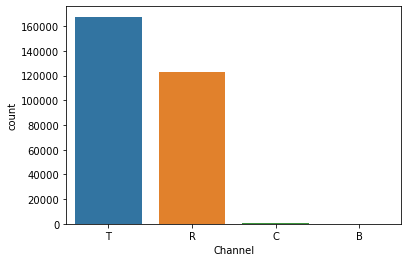

In [25]:
sns.countplot(data=data, x="Channel")

In [26]:
data["PPM"].unique()

array(['N', 'X', 'Y'], dtype=object)

<AxesSubplot:xlabel='PPM', ylabel='count'>

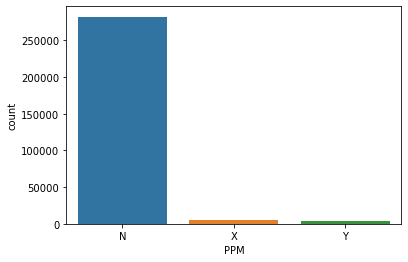

In [27]:
sns.countplot(data = data, x = 'PPM')

In [28]:
data["PropertyState"].unique()

array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'MS', 'NY', 'WA', 'AR', 'VA',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA',
       'NM', 'NV', 'VT', 'OH', 'NE', 'HI', 'ID', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

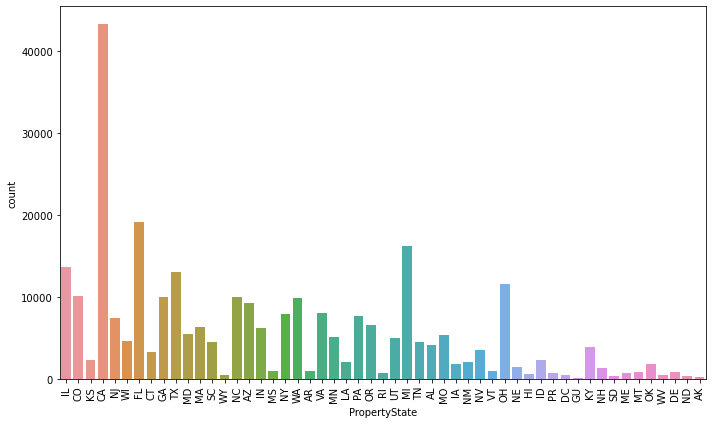

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PropertyState')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()
# There are highest loans from california

In [30]:
data["PropertyType"].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

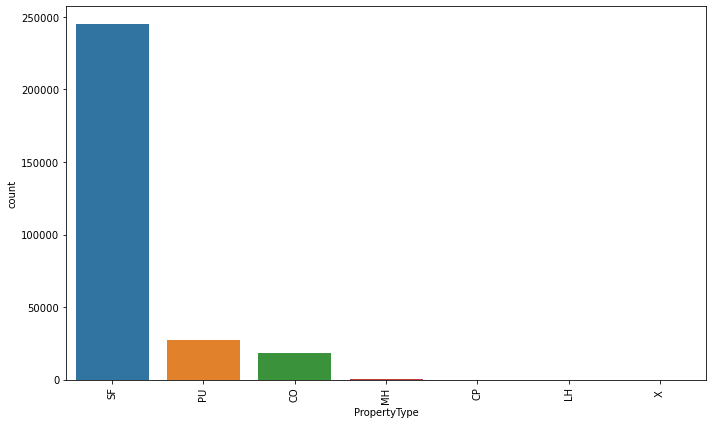

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PropertyType')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()
#Single family homes are dominant

In [32]:

data["LoanPurpose"].unique()

array(['P', 'N', 'C'], dtype=object)

<AxesSubplot:xlabel='LoanPurpose', ylabel='count'>

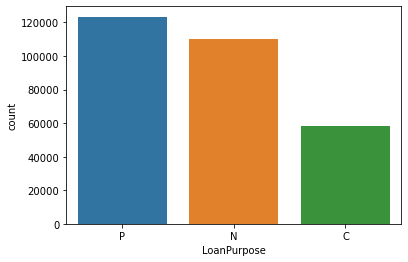

In [33]:
sns.countplot(data=data, x='LoanPurpose')
# Purchase loans are dominant compared to Refinance Loan and cash out Refinance Loan

In [34]:
data["NumBorrowers"].unique()

array(['2', '1', 'X '], dtype=object)

<AxesSubplot:xlabel='NumBorrowers', ylabel='count'>

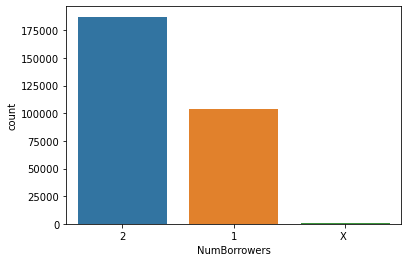

In [35]:
sns.countplot(data=data, x='NumBorrowers')
# The loans associated with 2 borrowers are higher in number 

In [36]:
data["EverDelinquent"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='EverDelinquent', ylabel='count'>

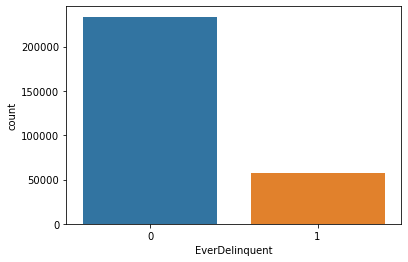

In [37]:
sns.countplot(data=data, x="EverDelinquent")
# Higher proportion of 0's indicate lower credit risk

In [38]:
data.set_index("LoanSeqNum",inplace=True)
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


# Data Encoding

In [39]:
data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                object
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
Channel                  object
PPM                      object
ProductType              object
PropertyState            object
PropertyType             object
PostalCode               object
LoanPurpose              object
OrigLoanTerm              int64
NumBorrowers             object
SellerName               object
ServicerName             object
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
dtype: object

In [40]:
# # Total 10 of categorical variables
# FirstTimeHomebuyer --> Ordinal
# MSA --> Ordinal
# Occupancy --> Ordinal
# Channel  --> Nominal              
# PPM      --> Nominal                                      
# PropertyType --> Nominal         
# PostalCode   --> Ordinal           
# LoanPurpose  --> Ordinal            
# SellerName --> Ordinal              
# ServicerName --> Ordinal
# Label Encosing for all Ordinal data and one hot encoding for all nominal data

In [41]:
encoded_data = data.copy()

In [42]:
encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [43]:
label_encoder = LabelEncoder()
encoded_data["Occupancy"] = label_encoder.fit_transform(encoded_data["Occupancy"])
encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,1,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,1,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,1,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,1,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,1,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [44]:
# List of columns to be label encoded
le = LabelEncoder()
columns_to_encode = ['PostalCode','MSA', 'LoanPurpose', 'SellerName','ServicerName','PropertyState',]

# Apply label encoding to train data
for column in columns_to_encode:
    encoded_data[column] = le.fit_transform(encoded_data[column])

In [45]:
encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,68,25,1,1,89,27,...,SF,521,2,360,2,7,17,0,0,52
F199Q1015092,0,1999-02,N,2029-01,95,0,1,1,73,17,...,SF,718,1,360,1,8,3,0,0,144
F199Q1266886,0,1999-02,N,2029-01,198,0,1,1,75,16,...,SF,577,1,360,2,7,17,0,0,67
F199Q1178167,0,1999-02,N,2029-01,210,0,1,1,76,14,...,SF,807,1,360,2,10,10,0,0,35
F199Q1178517,0,1999-02,N,2029-01,250,0,1,1,78,18,...,SF,672,1,360,2,10,10,0,0,54


In [46]:
encoded_data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [47]:
# Onehot encoding
Final_encoded_data = pd.get_dummies(encoded_data, columns=['Channel', 'PPM', 'PropertyType'])

In [48]:
Final_encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,68,25,1,1,89,27,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,0,1999-02,N,2029-01,95,0,1,1,73,17,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,0,1999-02,N,2029-01,198,0,1,1,75,16,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,0,1999-02,N,2029-01,210,0,1,1,76,14,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,0,1999-02,N,2029-01,250,0,1,1,78,18,...,1,0,0,0,0,0,0,0,1,0


In [49]:
Final_encoded_data.drop("ProductType",axis = 1,inplace = True)


In [50]:
Final_encoded_data["NumBorrowers"] = Final_encoded_data["NumBorrowers"].replace("X ", 99)

In [51]:
Final_encoded_data["NumBorrowers"] = Final_encoded_data["NumBorrowers"].astype(int)

In [52]:
Final_encoded_data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                       int32
MIP                       int64
Units                     int64
Occupancy                 int32
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
PropertyState             int32
PostalCode                int32
LoanPurpose               int32
OrigLoanTerm              int64
NumBorrowers              int32
SellerName                int32
ServicerName              int32
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
Channel_B                 uint8
Channel_C                 uint8
Channel_R                 uint8
Channel_T                 uint8
PPM_N                     uint8
PPM_X                     uint8
PPM_Y                     uint8
PropertyType_CO           uint8
Property

In [53]:
data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                object
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
Channel                  object
PPM                      object
ProductType              object
PropertyState            object
PropertyType             object
PostalCode               object
LoanPurpose              object
OrigLoanTerm              int64
NumBorrowers             object
SellerName               object
ServicerName             object
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
dtype: object

# Exploratory Data  Analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


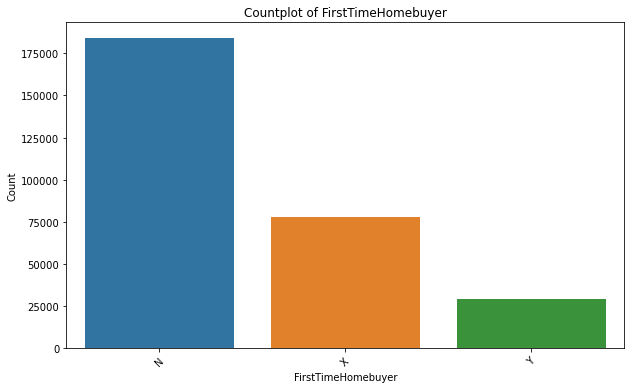

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


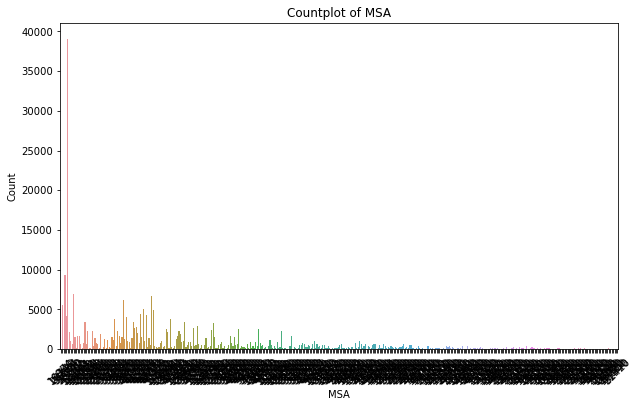

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


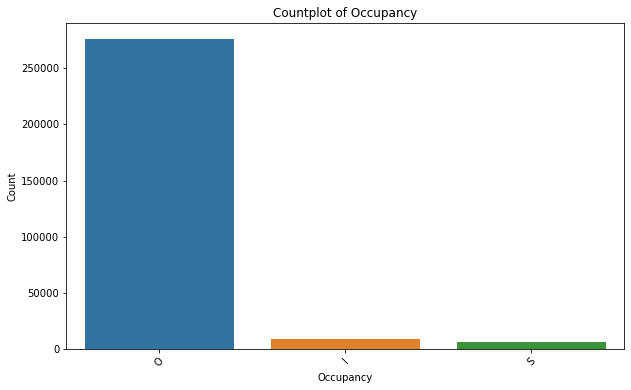

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


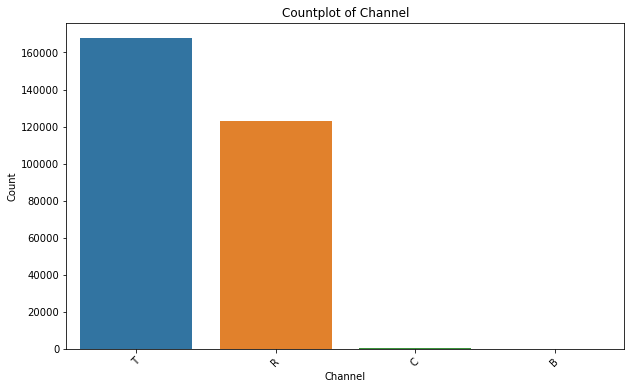

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


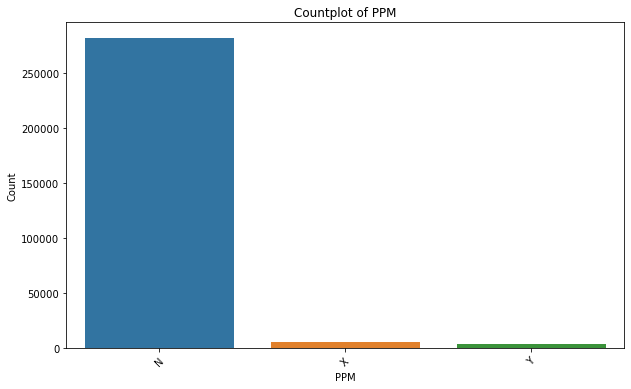

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


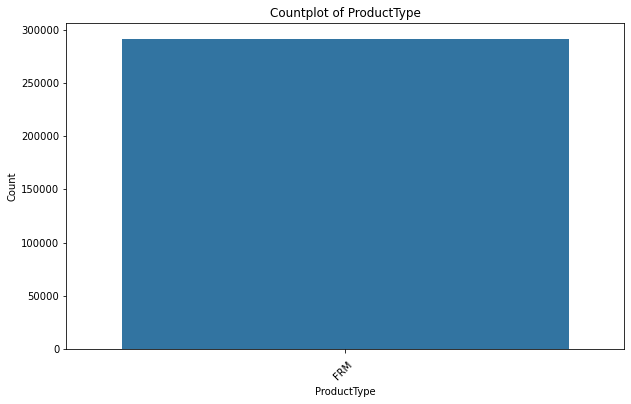

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


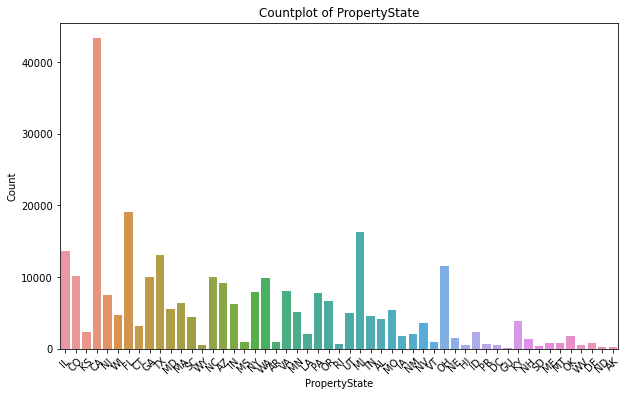

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


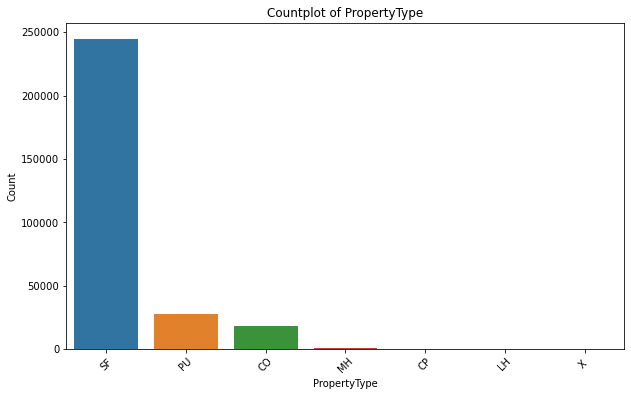

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


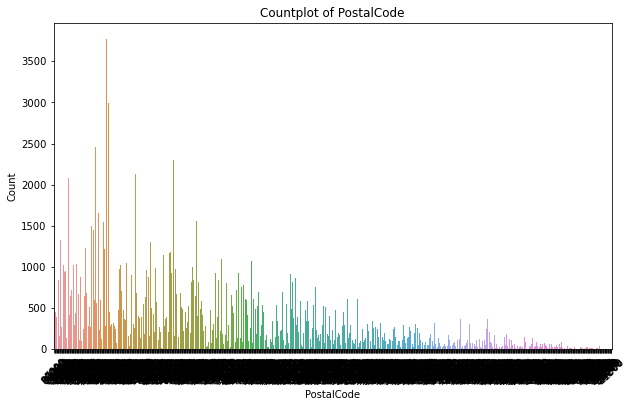

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


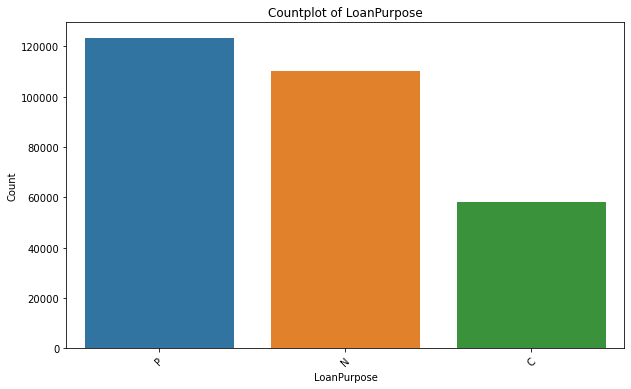

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


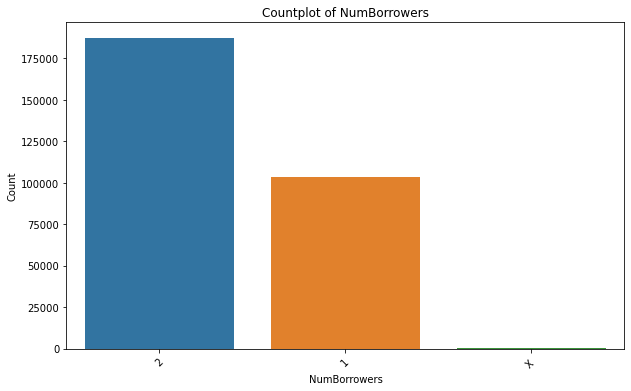

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


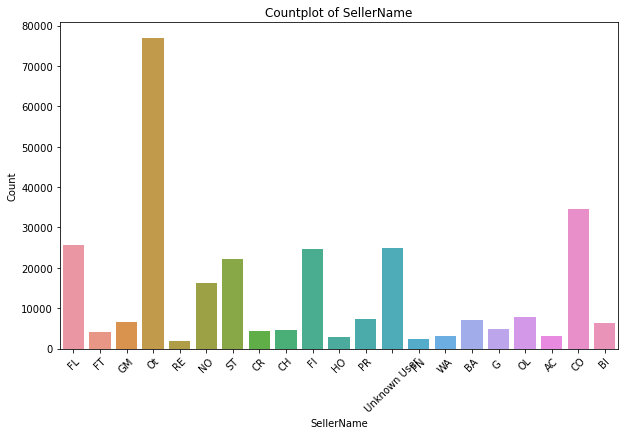

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


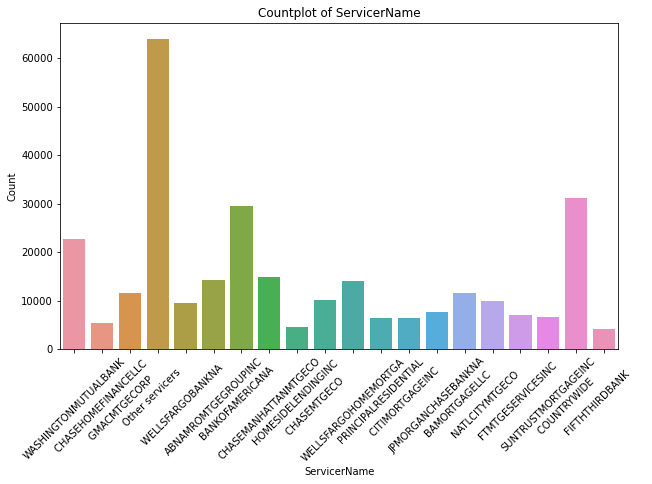

In [54]:
# Histograms for all Numeric columns 
categorical_columns = ['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType',
                       'PropertyState', 'PropertyType', 'PostalCode', 'LoanPurpose', 'NumBorrowers',
                       'SellerName', 'ServicerName']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [55]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

Text(0.5, 0, 'CreditScore')

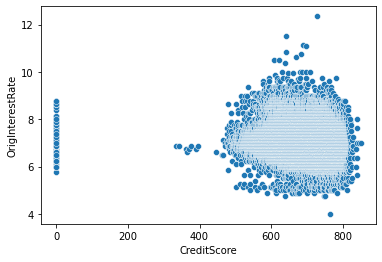

In [56]:
# # Scatter Plot
sns.scatterplot(x='CreditScore', y='OrigInterestRate', data=data)
# plt.title('Scatter Plot - CreditScore vs. OrigInterestRate')
plt.xlabel('CreditScore')
# # plt.ylabel('OrigInterestRate')
# plt.show()


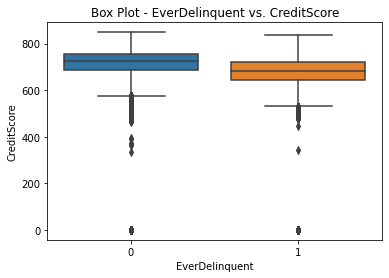

In [57]:
# Bivariate Analysis - Box Plot
sns.boxplot(x='EverDelinquent', y='CreditScore', data=data)
plt.title('Box Plot - EverDelinquent vs. CreditScore')
plt.xlabel('EverDelinquent')
plt.ylabel('CreditScore')
plt.show()

<AxesSubplot:xlabel='EverDelinquent', ylabel='MonthsDelinquent'>

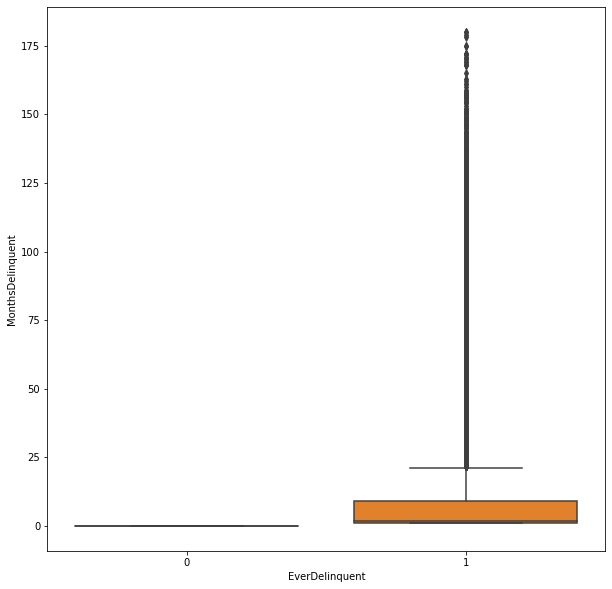

In [58]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='EverDelinquent', y='MonthsDelinquent', data=data)

<AxesSubplot:xlabel='EverDelinquent', ylabel='MonthsInRepayment'>

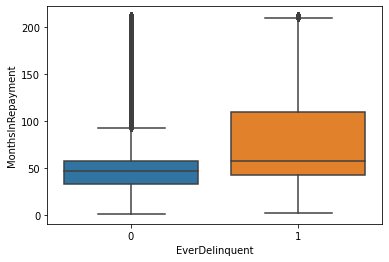

In [59]:
sns.boxplot(x='EverDelinquent', y='MonthsInRepayment', data=data)

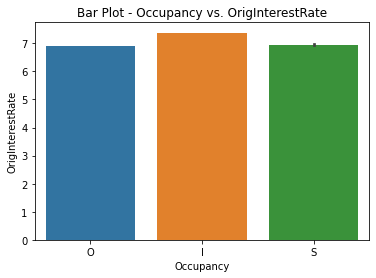

In [60]:
# Bivariate Analysis - Bar Plot
sns.barplot(x='Occupancy', y='OrigInterestRate', data=data)
plt.title('Bar Plot - Occupancy vs. OrigInterestRate')
plt.xlabel('Occupancy')
plt.ylabel('OrigInterestRate')
plt.show()

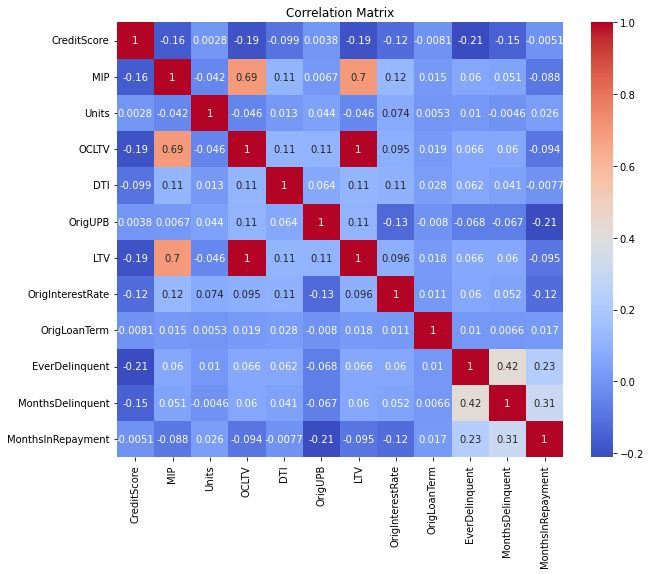

In [61]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

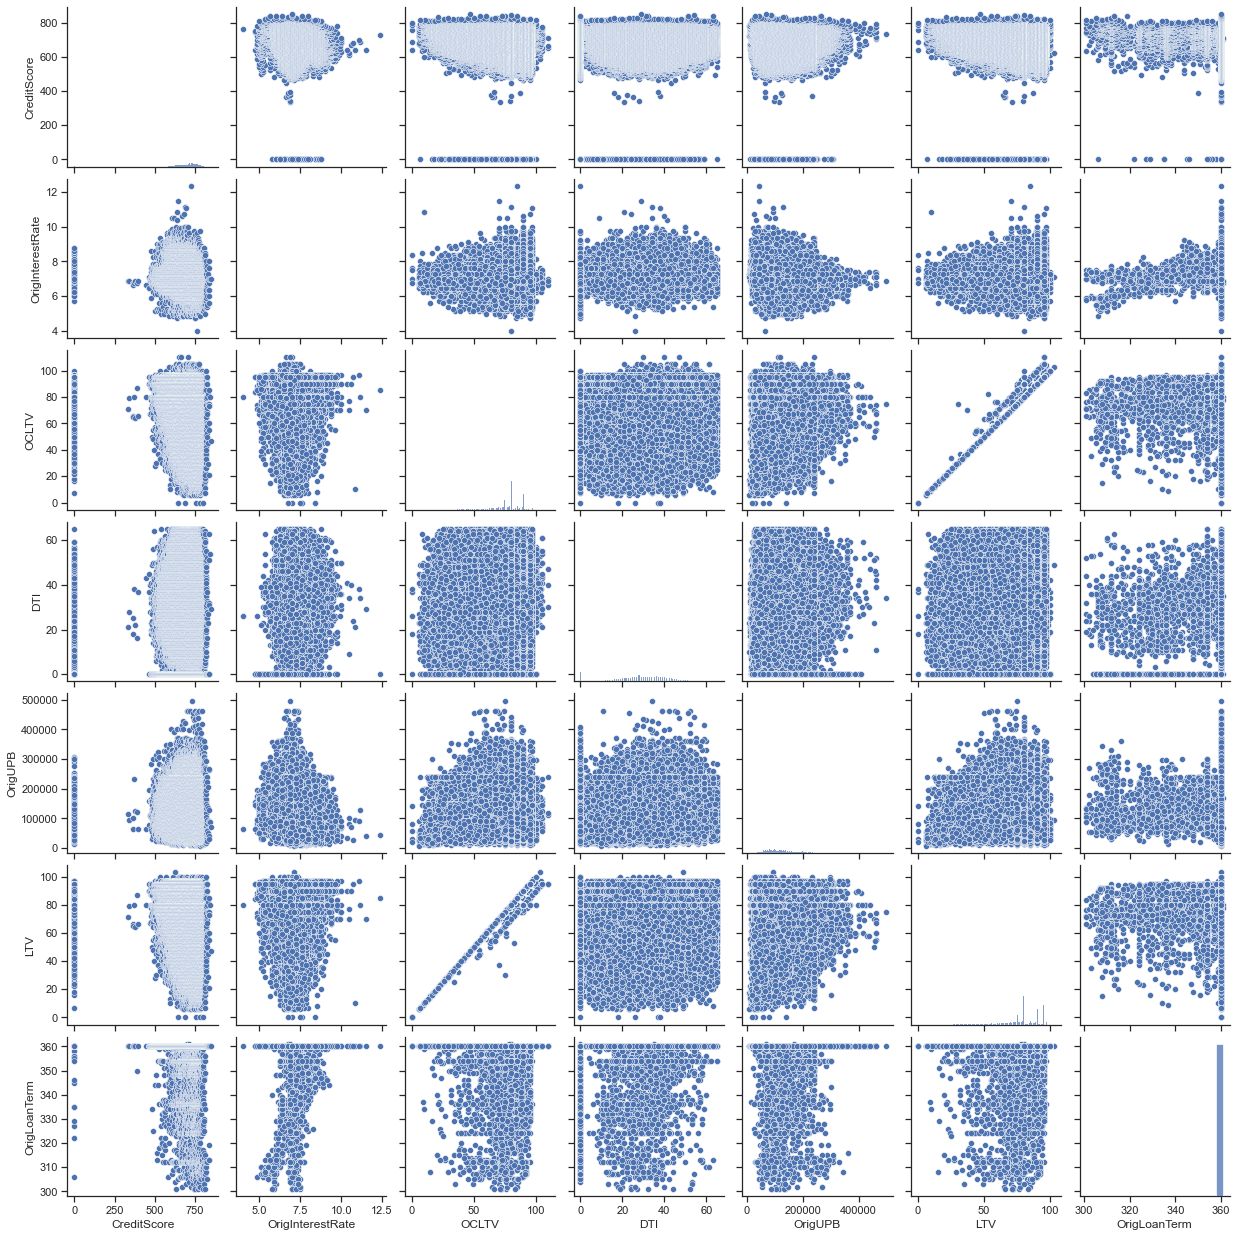

In [62]:
numeric_columns = ['CreditScore', 'OrigInterestRate', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigLoanTerm']
sns.set(style="ticks")
sns.pairplot(data[numeric_columns])
plt.show()

In [63]:
# transform discrete column to categoricsl -->specific cs score range poor, fair,good,excellent --> create with ranges
# Finanace doesnot work on discrete data (CSV)
# LTV(Low,med,high) must be of 3 ranges , FTHB (Firsttimehome buyer) contains 3 values X CONVERT THIS x To numerical and then u can drop it.
# MONTHSINREPAYMENT --> Also contains discrete variables, (total num of emi's in single loan) p-p --> if this has some 20years of time means it contains 240 emi's, in this can we make some range .create 5 labels in form of yearly basis (0--4,4--8,8--12,12--16,16--20)
#                                                          you can drop those columns after creating there transformations

In [64]:
Final_encoded_data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                       int32
MIP                       int64
Units                     int64
Occupancy                 int32
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
PropertyState             int32
PostalCode                int32
LoanPurpose               int32
OrigLoanTerm              int64
NumBorrowers              int32
SellerName                int32
ServicerName              int32
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
Channel_B                 uint8
Channel_C                 uint8
Channel_R                 uint8
Channel_T                 uint8
PPM_N                     uint8
PPM_X                     uint8
PPM_Y                     uint8
PropertyType_CO           uint8
Property

In [65]:
Final_encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,68,25,1,1,89,27,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,0,1999-02,N,2029-01,95,0,1,1,73,17,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,0,1999-02,N,2029-01,198,0,1,1,75,16,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,0,1999-02,N,2029-01,210,0,1,1,76,14,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,0,1999-02,N,2029-01,250,0,1,1,78,18,...,1,0,0,0,0,0,0,0,1,0


In [66]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [67]:
data['CreditScore'].value_counts

<bound method IndexOpsMixin.value_counts of LoanSeqNum
F199Q1268030      0
F199Q1015092      0
F199Q1266886      0
F199Q1178167      0
F199Q1178517      0
               ... 
F199Q1220925    839
F199Q1401332    840
F199Q1401282    840
F199Q1220924    845
F199Q1220923    849
Name: CreditScore, Length: 291451, dtype: int64>

In [68]:
# Credit score to categorical
thresholds = [0, 650, 700, 750, 900]
labels = ["Poor", "Fair", "Good", "Excellent"]
data["NewCreditScore"] = pd.cut(data["CreditScore"], bins=thresholds, labels=labels, right=False)

In [69]:
data.drop("CreditScore", axis=1, inplace=True)

In [70]:
data["NewCreditScore"].unique()

['Poor', 'Fair', 'Good', 'Excellent']
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

In [71]:
data['LTV'].value_counts()

80     54503
95     37209
90     29343
75     17918
79      7329
       ...  
6          9
98         6
0          5
103        1
99         1
Name: LTV, Length: 97, dtype: int64

In [72]:
thresholds = [
    (data["LTV"] >= 1) & (data["LTV"] < 60),     # Low LTV
    (data["LTV"] >= 60) & (data["LTV"] < 80),    # Medium LTV
    (data["LTV"] >= 80) | (data["LTV"]==0)       # High LTV
]
labels = ["Low LTV", "Moderate LTV", "High LTV"]
data["LTV Group"] = pd.Categorical(pd.np.select(thresholds, labels, default="Unknown"), categories=labels)


C:\Users\DELL\AppData\Local\Temp\ipykernel_8280\3897522209.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data["LTV Group"] = pd.Categorical(pd.np.select(thresholds, labels, default="Unknown"), categories=labels)


In [73]:
data.drop("LTV", axis=1, inplace=True)

In [74]:
data['LTV Group'].value_counts()

High LTV        158323
Moderate LTV     95921
Low LTV          37207
Name: LTV Group, dtype: int64

In [75]:
data['LTV Group'].unique()

['High LTV', 'Moderate LTV', 'Low LTV']
Categories (3, object): ['Low LTV', 'Moderate LTV', 'High LTV']

In [76]:
data["FirstTimeHomebuyer"].unique()

array(['N', 'X', 'Y'], dtype=object)

In [77]:
data["MonthsInRepayment"].value_counts()

50     8002
49     7976
52     7947
51     7753
53     7603
       ... 
207     112
200     111
205     107
203     100
204      99
Name: MonthsInRepayment, Length: 212, dtype: int64

In [78]:
data["MonthsInRepayment"].unique()

array([ 52, 144,  67,  35,  54,  42,  44, 145,  64, 212,  37,  47,  53,
        55,  66,  26,  38,  36,  39,  40,  11, 176,  46, 197, 210,  56,
       118,  63,  24,  28,  91,  50,  22, 211, 199,  23,  30, 125,  41,
        76,  49,  18,  19,  43,  60,  83,  95,  29,  45,  13,   6,  48,
        62,  14,  15, 111,  51,  17,  75,  58,  27,  10,  31, 133, 165,
       156,  33,  68, 205,  57, 159,  81, 191, 194, 114,  59, 100, 134,
        74,   9,  34,  77, 170, 122,  69,  72, 206, 148, 153, 101, 180,
         8,  32,   5, 207,   7, 128,  71,  65,  79, 174, 195, 151, 149,
        21,  12, 137, 130,  70, 173, 166,  61, 160,  20, 178,   3, 147,
         2, 164, 139, 108,  92, 209, 102,  87,  94,  73, 123,  16, 142,
         1, 172, 109, 141, 175, 103, 168, 155, 177, 158, 138,  25, 110,
        98,  84, 208, 188, 106, 112, 121, 136, 179,   4, 154, 161, 157,
       150,  80, 183,  93, 143, 162, 126,  89, 184,  82, 117, 107, 193,
        85, 124, 192,  78, 169, 104, 131, 140, 163, 182, 132, 13

In [79]:
threshold = [
    (data["MonthsInRepayment"] >= 0) & (data["MonthsInRepayment"] < 48),
    (data["MonthsInRepayment"] >= 48) & (data["MonthsInRepayment"] < 96),
    (data["MonthsInRepayment"] >= 96) & (data["MonthsInRepayment"] < 144),
    (data["MonthsInRepayment"] >= 144) & (data["MonthsInRepayment"] < 192),
    (data["MonthsInRepayment"] >= 192) & (data["MonthsInRepayment"] < 240)
]
labels = ["Quart1", "Quart2", "Quart3", "Quart4", "Quart5"]

data["MonthsInRepayment Group"] = pd.Categorical(pd.np.select(threshold, labels, default=data["MonthsInRepayment"]))


C:\Users\DELL\AppData\Local\Temp\ipykernel_8280\2654710780.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data["MonthsInRepayment Group"] = pd.Categorical(pd.np.select(threshold, labels, default=data["MonthsInRepayment"]))


In [80]:
# Drop the old 'MonthsInRepayment' column
data.drop("MonthsInRepayment", axis=1, inplace=True)


In [81]:
data["MonthsInRepayment Group"].value_counts()

Quart1    141480
Quart2    105332
Quart3     19945
Quart4     12805
Quart5     11889
Name: MonthsInRepayment Group, dtype: int64

In [82]:
data["MonthsInRepayment Group"].unique()

['Quart2', 'Quart4', 'Quart1', 'Quart5', 'Quart3']
Categories (5, object): ['Quart1', 'Quart2', 'Quart3', 'Quart4', 'Quart5']

In [83]:
# Label encoding for the new columns :- NewCreditScore, LTV Group, MonthsInRepayment Group

In [84]:
Final_encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,68,25,1,1,89,27,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,0,1999-02,N,2029-01,95,0,1,1,73,17,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,0,1999-02,N,2029-01,198,0,1,1,75,16,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,0,1999-02,N,2029-01,210,0,1,1,76,14,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,0,1999-02,N,2029-01,250,0,1,1,78,18,...,1,0,0,0,0,0,0,0,1,0


In [85]:
#Final_encoded_data.drop("CreditScore", axis=1, inplace=True)


In [86]:
Final_encoded_data.drop("LTV",axis = 1,inplace = True)
Final_encoded_data.drop("MonthsInRepayment",axis=1,inplace=True)

In [87]:
Final_encoded_data["NewCreditScore"] = label_encoder.fit_transform(data["NewCreditScore"])

In [88]:
Final_encoded_data["NewCreditScore"].unique()

array([3, 1, 2, 0])

In [89]:
Final_encoded_data["LTV Group"]=label_encoder.fit_transform(data["LTV Group"])

In [90]:
Final_encoded_data["LTV Group"].unique()

array([0, 2, 1])

In [91]:
Final_encoded_data["MonthsInRepayment Group"] = data["MonthsInRepayment Group"].map({"Quart1": 0, "Quart2": 1, "Quart3": 2, "Quart4": 3,"Quart5":4})

In [92]:
Final_encoded_data["MonthsInRepayment Group"].unique()

[1, 3, 0, 4, 2]
Categories (5, int64): [0, 1, 2, 3, 4]

In [93]:
Final_encoded_data["MonthsInRepayment Group"].value_counts()

0    141480
1    105332
2     19945
3     12805
4     11889
Name: MonthsInRepayment Group, dtype: int64

In [94]:
data["MonthsInRepayment Group"] = data["MonthsInRepayment Group"].astype("category")

<AxesSubplot:xlabel='NewCreditScore', ylabel='count'>

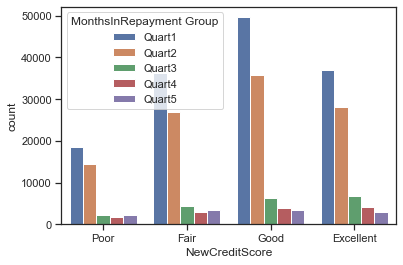

In [95]:
sns.countplot(x="NewCreditScore",hue="MonthsInRepayment Group",data=data)

In [96]:
grouped_data = data.groupby(["NewCreditScore", "MonthsInRepayment Group"]).size().unstack()

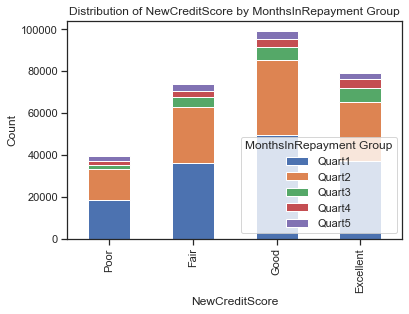

In [97]:
grouped_data.plot(kind="bar", stacked=True)
plt.xlabel("NewCreditScore")
plt.ylabel("Count")
plt.title("Distribution of NewCreditScore by MonthsInRepayment Group")
plt.legend(title="MonthsInRepayment Group")
plt.show()

<AxesSubplot:xlabel='LTV Group', ylabel='count'>

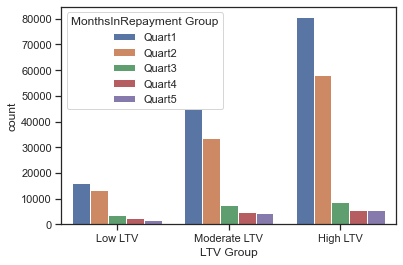

In [98]:
sns.countplot(x="LTV Group",hue="MonthsInRepayment Group",data=data)

<AxesSubplot:xlabel='CreditScore'>

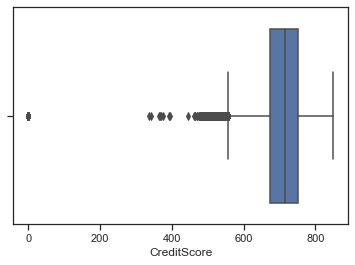

In [99]:
sns.boxplot(data=Final_encoded_data, x="CreditScore")

<AxesSubplot:xlabel='CreditScore'>

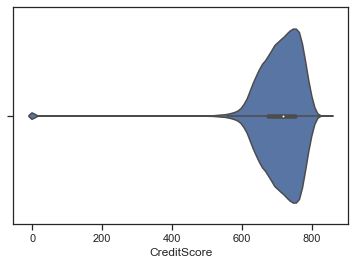

In [100]:
sns.violinplot(data=Final_encoded_data, x="CreditScore")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DTI'>

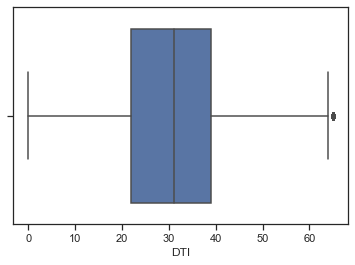

In [101]:
sns.boxplot(data["DTI"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OrigUPB'>

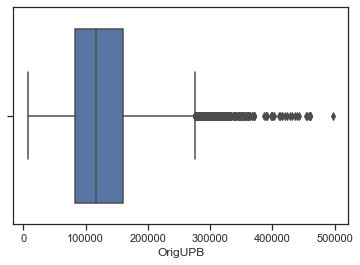

In [102]:
sns.boxplot(data["OrigUPB"])

(array([2.1760e+04, 1.0038e+05, 8.9631e+04, 4.9818e+04, 2.8079e+04,
        1.4200e+03, 2.8700e+02, 5.0000e+01, 1.6000e+01, 1.0000e+01]),
 array([  8000.,  56900., 105800., 154700., 203600., 252500., 301400.,
        350300., 399200., 448100., 497000.]),
 <BarContainer object of 10 artists>)

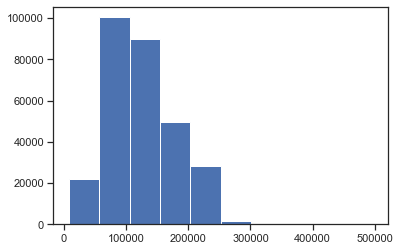

In [103]:
plt.hist(data["OrigUPB"])
# Thers is high unpaid balance which is not good for the lender

(array([19148.,  7684., 28322., 41324., 64535., 55250., 44644., 17537.,
         9674.,  3333.]),
 array([ 0. ,  6.5, 13. , 19.5, 26. , 32.5, 39. , 45.5, 52. , 58.5, 65. ]),
 <BarContainer object of 10 artists>)

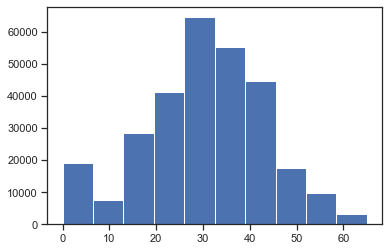

In [104]:
plt.hist(data["DTI"])
# Debit to income ratio is high for more buyers which says it is not good for a lender

In [105]:
Final_encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X,NewCreditScore,LTV Group,MonthsInRepayment Group
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,68,25,1,1,89,27,...,0,0,0,0,0,1,0,3,0,1
F199Q1015092,0,1999-02,N,2029-01,95,0,1,1,73,17,...,0,0,0,0,0,1,0,3,2,3
F199Q1266886,0,1999-02,N,2029-01,198,0,1,1,75,16,...,0,0,0,0,0,1,0,3,2,1
F199Q1178167,0,1999-02,N,2029-01,210,0,1,1,76,14,...,0,0,0,0,0,1,0,3,2,0
F199Q1178517,0,1999-02,N,2029-01,250,0,1,1,78,18,...,0,0,0,0,0,1,0,3,2,1


In [106]:
Final_encoded_data.describe()

,CreditScore,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,PropertyState,...,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X,NewCreditScore,LTV Group
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,...,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,230.144776,9.216685,1.026022,0.992630,76.960529,30.033453,124940.387921,6.926547,22.693636,...,0.013453,0.062103,0.000247,0.000360,0.002481,0.094376,0.840357,0.000075,1.337226,0.785892
std,68.408791,122.640635,12.648273,0.202986,0.229152,15.236154,13.203974,53657.440624,0.343541,15.694236,...,0.115206,0.241343,0.015716,0.018977,0.049745,0.292352,0.366275,0.008688,1.018347,0.909120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,675.000000,104.000000,0.000000,1.000000,1.000000,70.000000,22.000000,83000.000000,6.750000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,717.000000,250.000000,0.000000,1.000000,1.000000,80.000000,31.000000,117000.000000,6.875000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,753.000000,330.000000,25.000000,1.000000,1.000000,90.000000,39.000000,160000.000000,7.125000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
max,849.000000,391.000000,55.000000,4.000000,2.000000,110.000000,65.000000,497000.000000,12.350000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


In [107]:
Final_encoded_data.dtypes

CreditScore                    int64
FirstPaymentDate           period[M]
FirstTimeHomebuyer            object
MaturityDate               period[M]
MSA                            int32
MIP                            int64
Units                          int64
Occupancy                      int32
OCLTV                          int64
DTI                            int64
OrigUPB                        int64
OrigInterestRate             float64
PropertyState                  int32
PostalCode                     int32
LoanPurpose                    int32
OrigLoanTerm                   int64
NumBorrowers                   int32
SellerName                     int32
ServicerName                   int32
EverDelinquent                 int64
MonthsDelinquent               int64
Channel_B                      uint8
Channel_C                      uint8
Channel_R                      uint8
Channel_T                      uint8
PPM_N                          uint8
PPM_X                          uint8
P

In [108]:
Final_encoded_data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'PropertyState', 'PostalCode', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'Channel_B', 'Channel_C',
       'Channel_R', 'Channel_T', 'PPM_N', 'PPM_X', 'PPM_Y', 'PropertyType_CO',
       'PropertyType_CP', 'PropertyType_LH', 'PropertyType_MH',
       'PropertyType_PU', 'PropertyType_SF', 'PropertyType_X ',
       'NewCreditScore', 'LTV Group', 'MonthsInRepayment Group'],
      dtype='object')

<AxesSubplot:>

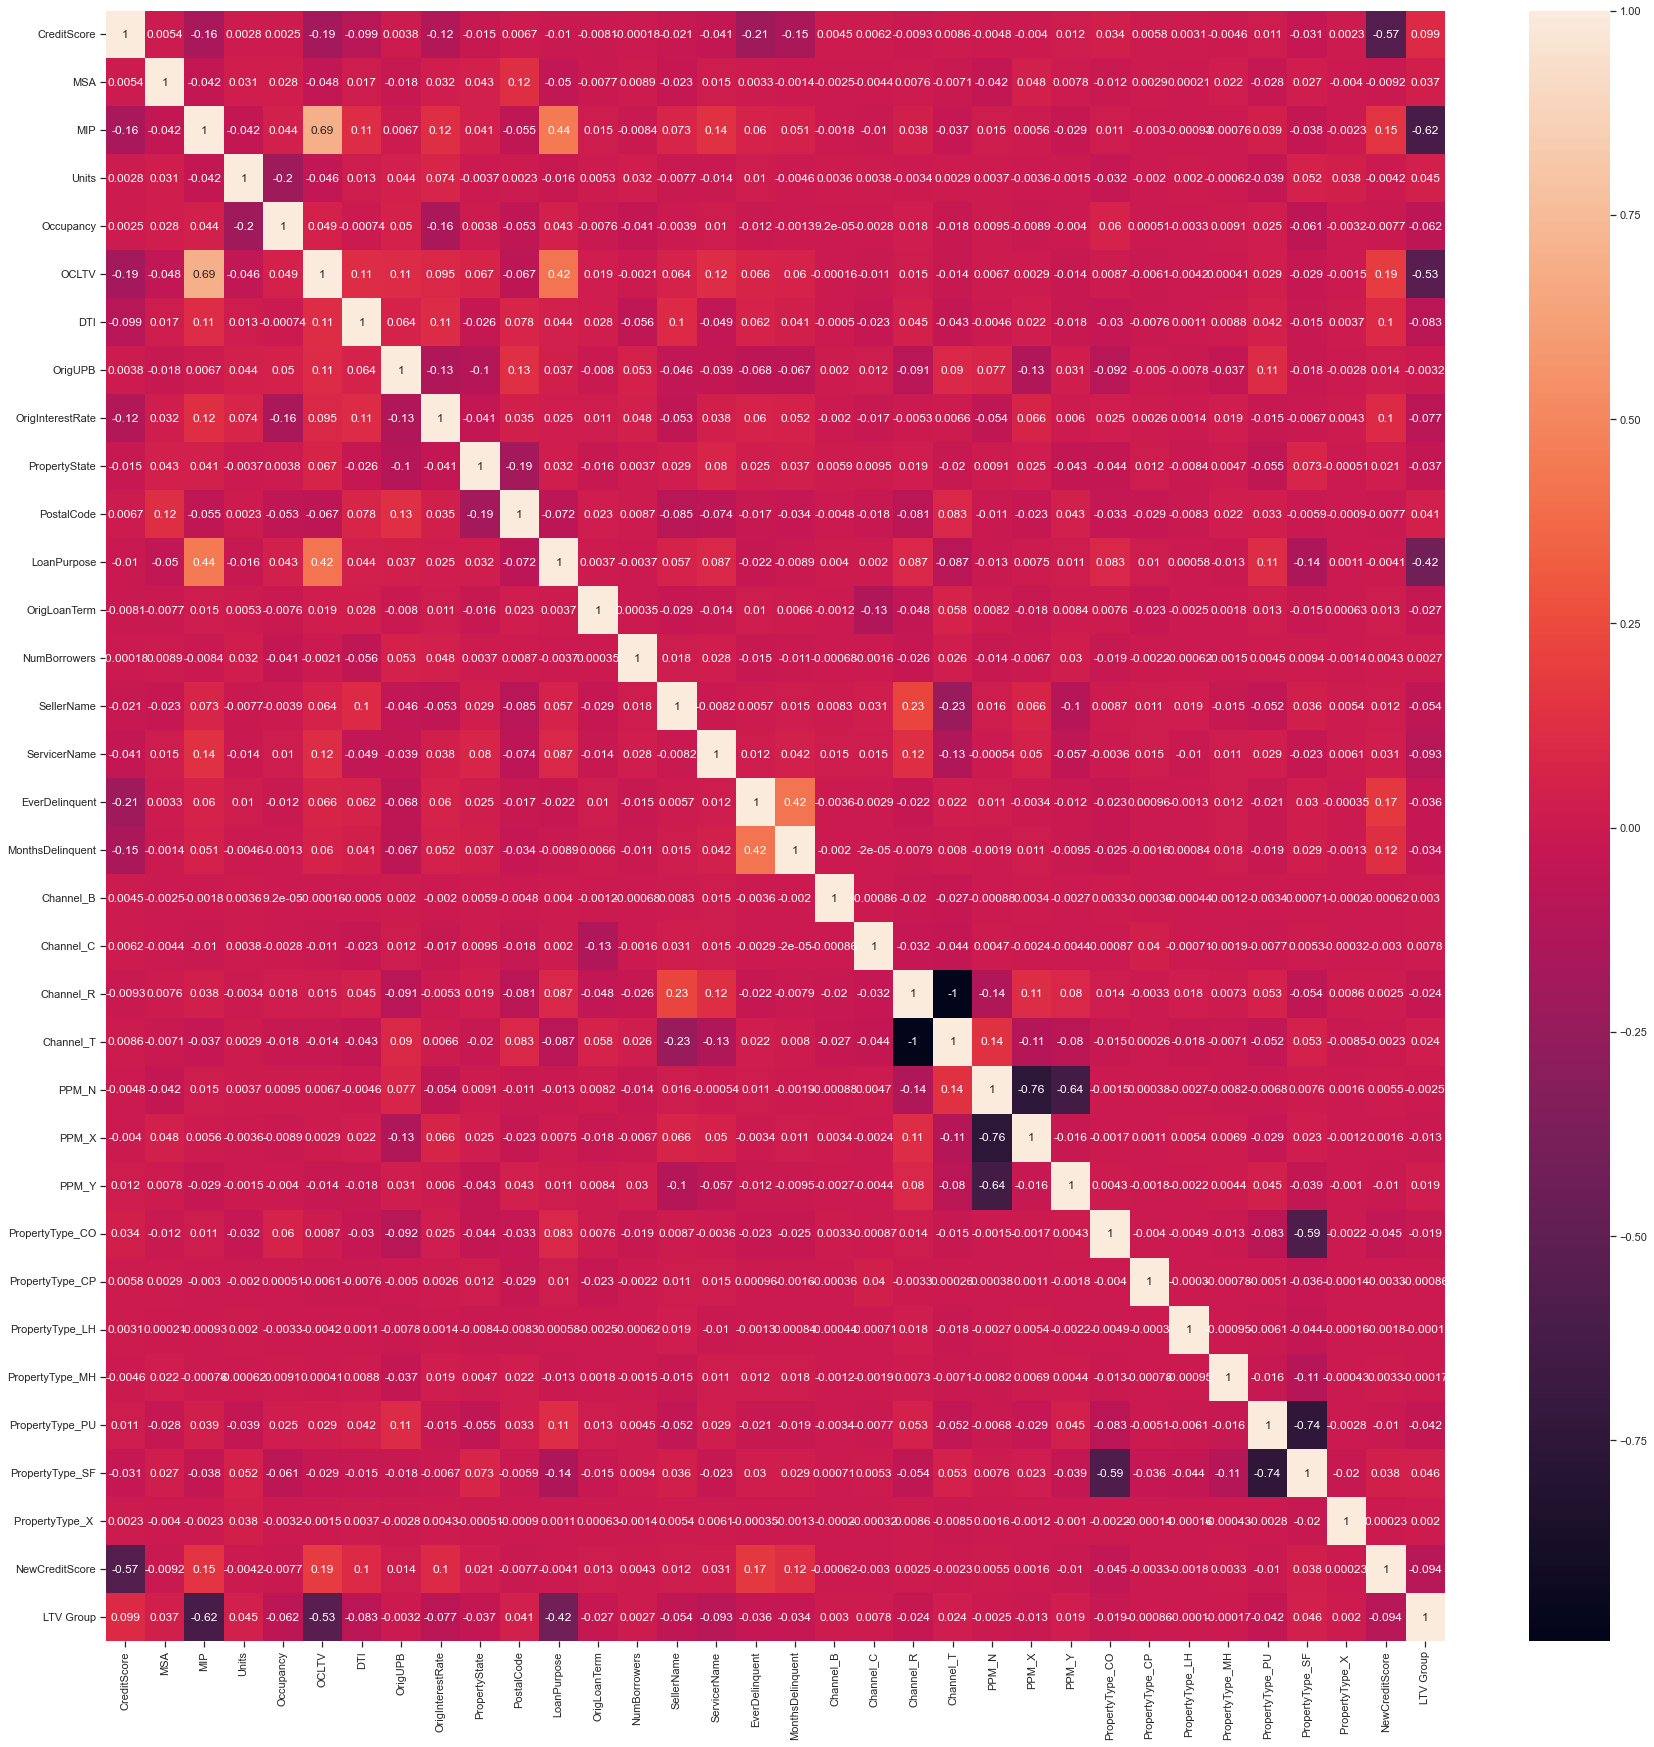

In [109]:
plt.figure(figsize=(30, 30))
correlation_matrix = Final_encoded_data.corr()
sns.heatmap(correlation_matrix, annot=True)

In [110]:
# MSA,Seller Name,Proprty_Type_CP(very less corelated)property_type_x(Very less) are having less corelation with the class label 

In [111]:
X = Final_encoded_data.drop('EverDelinquent', axis=1)  # Features
y = Final_encoded_data['EverDelinquent']  # Target variable

In [112]:
Final_encoded_data['FirstPaymentDate'] = Final_encoded_data['FirstPaymentDate'].dt.to_timestamp().astype('int64')
Final_encoded_data['MaturityDate'] = Final_encoded_data['MaturityDate'].dt.to_timestamp().astype('int64')


In [113]:
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

In [114]:
for column in non_numeric_columns:
    unique_values = X[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")


Column: FirstPaymentDate
Unique Values: <PeriodArray>
['1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08',
 '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-04', '2000-05',
 '2000-06', '2001-05', '2000-09', '2002-04', '2003-03', '2002-12', '2000-07',
 '2000-03', '2002-06', '2000-02', '2000-08', '2001-06', '2000-11', '2001-03',
 '2002-02', '2001-01', '2003-04', '2000-10', '2001-12', '2001-02', '2003-08',
 '2001-07', '2002-10', '2001-04', '2001-10', '2001-08', '2003-09', '2003-05',
 '2002-01', '2001-09', '2001-11', '2003-12', '2004-05', '2002-09', '1999-01',
 '2003-01', '2002-08', '2000-12', '2002-03', '2003-06', '2003-07', '2003-02',
 '2002-05', '2002-07', '2002-11', '2004-01', '2011-11', '2013-03', '2003-10',
 '2003-11', '2004-03', '2004-04']
Length: 66, dtype: period[M]

Column: FirstTimeHomebuyer
Unique Values: ['N' 'X' 'Y']

Column: MaturityDate
Unique Values: <PeriodArray>
['2029-01', '2027-10', '2029-02', '2024-09', '2027-02', '2029-03', '2026-

In [115]:
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    X[column] = label_encoder.fit_transform(X[column])

In [116]:
best_features = SelectKBest(score_func=chi2, k=25).fit(X, y)

In [117]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': best_features.scores_})
selected_features = feature_scores.nlargest(25, 'Score')['Feature'].tolist()

In [118]:
display(feature_scores)

,Feature,Score
0,CreditScore,8.259904e+04
1,FirstPaymentDate,5.493861e+01
2,FirstTimeHomebuyer,2.346114e+01
3,MaturityDate,4.728800e-03
4,MSA,2.057292e+02
5,MIP,1.820773e+04
6,Units,1.208859e+00
7,Occupancy,2.329238e+00
8,OCLTV,3.774875e+03
9,DTI,6.526476e+03


In [119]:
display(selected_features)


['OrigUPB',
 'MonthsDelinquent',
 'CreditScore',
 'MonthsInRepayment Group',
 'MIP',
 'PostalCode',
 'NewCreditScore',
 'DTI',
 'OCLTV',
 'PropertyState',
 'NumBorrowers',
 'LTV Group',
 'MSA',
 'ServicerName',
 'PropertyType_CO',
 'PropertyType_PU',
 'Channel_R',
 'LoanPurpose',
 'Channel_T',
 'FirstPaymentDate',
 'PropertyType_MH',
 'PropertyType_SF',
 'PPM_Y',
 'SellerName',
 'FirstTimeHomebuyer']

In [120]:
unselected_features = list(set(X.columns) - set(selected_features))

In [121]:
unselected_features

['Channel_B',
 'OrigInterestRate',
 'PropertyType_CP',
 'PropertyType_X ',
 'PropertyType_LH',
 'PPM_N',
 'Occupancy',
 'OrigLoanTerm',
 'Channel_C',
 'Units',
 'PPM_X',
 'MaturityDate']

In [122]:
drop_features = ['PPM_N', 'Channel_B','Units','PPM_X','PropertyType_X ','Occupancy','OrigInterestRate','Channel_C', 'PropertyType_LH','PropertyType_CP','OrigLoanTerm']
df_selected = Final_encoded_data.drop(drop_features, axis=1)

In [123]:
df_selected

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,Channel_R,Channel_T,PPM_Y,PropertyType_CO,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,917827200000000000,N,1861920000000000000,68,25,89,27,117000,15,...,0,1,0,0,0,0,1,3,0,1
F199Q1015092,0,917827200000000000,N,1861920000000000000,95,0,73,17,109000,5,...,1,0,0,0,0,0,1,3,2,3
F199Q1266886,0,917827200000000000,N,1861920000000000000,198,0,75,16,88000,17,...,0,1,0,0,0,0,1,3,2,1
F199Q1178167,0,917827200000000000,N,1861920000000000000,210,0,76,14,160000,4,...,1,0,0,0,0,0,1,3,2,0
F199Q1178517,0,917827200000000000,N,1861920000000000000,250,0,78,18,109000,32,...,1,0,0,0,0,0,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F199Q1220925,839,920246400000000000,N,1864598400000000000,274,0,60,32,90000,39,...,1,0,0,0,0,0,1,0,2,0
F199Q1401332,840,1033430400000000000,N,1869696000000000000,250,0,73,0,267000,35,...,0,0,0,0,0,0,1,0,2,1
F199Q1401282,840,1049155200000000000,N,1869696000000000000,323,0,73,31,87000,4,...,1,0,0,0,0,0,1,0,2,0


In [124]:
df_selected.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'PropertyState', 'PostalCode',
       'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'Channel_R', 'Channel_T', 'PPM_Y',
       'PropertyType_CO', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'NewCreditScore', 'LTV Group',
       'MonthsInRepayment Group'],
      dtype='object')

In [125]:
df_selected.dtypes

CreditScore                   int64
FirstPaymentDate              int64
FirstTimeHomebuyer           object
MaturityDate                  int64
MSA                           int32
MIP                           int64
OCLTV                         int64
DTI                           int64
OrigUPB                       int64
PropertyState                 int32
PostalCode                    int32
LoanPurpose                   int32
NumBorrowers                  int32
SellerName                    int32
ServicerName                  int32
EverDelinquent                int64
MonthsDelinquent              int64
Channel_R                     uint8
Channel_T                     uint8
PPM_Y                         uint8
PropertyType_CO               uint8
PropertyType_MH               uint8
PropertyType_PU               uint8
PropertyType_SF               uint8
NewCreditScore                int32
LTV Group                     int32
MonthsInRepayment Group    category
dtype: object

In [126]:
df_selected['FirstPaymentDate'].isnull().sum()

0

In [127]:
df_selected['FirstPaymentDate'].unique()

array([ 917827200000000000,  920246400000000000,  922924800000000000,
        925516800000000000,  928195200000000000,  930787200000000000,
        933465600000000000,  936144000000000000,  938736000000000000,
        941414400000000000,  944006400000000000,  946684800000000000,
        954547200000000000,  957139200000000000,  959817600000000000,
        988675200000000000,  967766400000000000, 1017619200000000000,
       1046476800000000000, 1038700800000000000,  962409600000000000,
        951868800000000000, 1022889600000000000,  949363200000000000,
        965088000000000000,  991353600000000000,  973036800000000000,
        983404800000000000, 1012521600000000000,  978307200000000000,
       1049155200000000000,  970358400000000000, 1007164800000000000,
        980985600000000000, 1059696000000000000,  993945600000000000,
       1033430400000000000,  986083200000000000, 1001894400000000000,
        996624000000000000, 1062374400000000000, 1051747200000000000,
       1009843200000

In [128]:
df_selected['FirstPaymentDate'] = pd.to_datetime(df_selected['FirstPaymentDate'], unit='ns')


In [129]:
df_selected['MaturityDate'] = pd.to_datetime(df_selected['MaturityDate'], unit='ns')

In [130]:
df_selected.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,Channel_R,Channel_T,PPM_Y,PropertyType_CO,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02-01,N,2029-01-01,68,25,89,27,117000,15,...,0,1,0,0,0,0,1,3,0,1
F199Q1015092,0,1999-02-01,N,2029-01-01,95,0,73,17,109000,5,...,1,0,0,0,0,0,1,3,2,3
F199Q1266886,0,1999-02-01,N,2029-01-01,198,0,75,16,88000,17,...,0,1,0,0,0,0,1,3,2,1
F199Q1178167,0,1999-02-01,N,2029-01-01,210,0,76,14,160000,4,...,1,0,0,0,0,0,1,3,2,0
F199Q1178517,0,1999-02-01,N,2029-01-01,250,0,78,18,109000,32,...,1,0,0,0,0,0,1,3,2,1


In [131]:
df_selected.isnull().any()

CreditScore                False
FirstPaymentDate           False
FirstTimeHomebuyer         False
MaturityDate               False
MSA                        False
MIP                        False
OCLTV                      False
DTI                        False
OrigUPB                    False
PropertyState              False
PostalCode                 False
LoanPurpose                False
NumBorrowers               False
SellerName                 False
ServicerName               False
EverDelinquent             False
MonthsDelinquent           False
Channel_R                  False
Channel_T                  False
PPM_Y                      False
PropertyType_CO            False
PropertyType_MH            False
PropertyType_PU            False
PropertyType_SF            False
NewCreditScore             False
LTV Group                  False
MonthsInRepayment Group    False
dtype: bool

In [132]:
df_selected.isnull().sum()

CreditScore                0
FirstPaymentDate           0
FirstTimeHomebuyer         0
MaturityDate               0
MSA                        0
MIP                        0
OCLTV                      0
DTI                        0
OrigUPB                    0
PropertyState              0
PostalCode                 0
LoanPurpose                0
NumBorrowers               0
SellerName                 0
ServicerName               0
EverDelinquent             0
MonthsDelinquent           0
Channel_R                  0
Channel_T                  0
PPM_Y                      0
PropertyType_CO            0
PropertyType_MH            0
PropertyType_PU            0
PropertyType_SF            0
NewCreditScore             0
LTV Group                  0
MonthsInRepayment Group    0
dtype: int64

In [133]:
df_selected['LoanDuration'] = df_selected['MaturityDate'] - df_selected['FirstPaymentDate']

In [134]:
df_selected.head(10)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,Channel_T,PPM_Y,PropertyType_CO,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group,LoanDuration
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02-01,N,2029-01-01,68,25,89,27,117000,15,...,1,0,0,0,0,1,3,0,1,10927 days
F199Q1015092,0,1999-02-01,N,2029-01-01,95,0,73,17,109000,5,...,0,0,0,0,0,1,3,2,3,10927 days
F199Q1266886,0,1999-02-01,N,2029-01-01,198,0,75,16,88000,17,...,1,0,0,0,0,1,3,2,1,10927 days
F199Q1178167,0,1999-02-01,N,2029-01-01,210,0,76,14,160000,4,...,0,0,0,0,0,1,3,2,0,10927 days
F199Q1178517,0,1999-02-01,N,2029-01-01,250,0,78,18,109000,32,...,0,0,0,0,0,1,3,2,1,10927 days
F199Q1224802,0,1999-02-01,N,2029-01-01,391,25,89,40,207000,5,...,1,0,0,0,0,1,3,0,0,10927 days
F199Q1291436,0,1999-02-01,N,2029-01-01,391,25,90,21,111000,50,...,1,0,0,0,0,1,3,0,0,10927 days
F199Q1001824,0,1999-02-01,X,2029-01-01,262,0,72,20,97000,9,...,0,0,0,0,0,1,3,2,3,10927 days
F199Q1079744,0,1999-02-01,Y,2027-10-01,151,30,95,38,55000,6,...,0,0,0,0,0,1,3,0,1,10469 days


In [135]:
df_selected.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'PropertyState', 'PostalCode',
       'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'Channel_R', 'Channel_T', 'PPM_Y',
       'PropertyType_CO', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'NewCreditScore', 'LTV Group',
       'MonthsInRepayment Group', 'LoanDuration'],
      dtype='object')

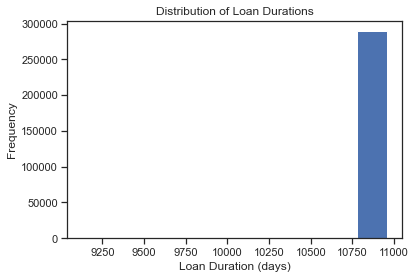

In [136]:
df_selected['LoanDuration_days'] = df_selected['LoanDuration'].dt.days
plt.hist(df_selected['LoanDuration_days'], bins=10)
plt.xlabel('Loan Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Durations')
plt.show()


In [137]:
df_selected.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,PPM_Y,PropertyType_CO,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group,LoanDuration,LoanDuration_days
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02-01,N,2029-01-01,68,25,89,27,117000,15,...,0,0,0,0,1,3,0,1,10927 days,10927
F199Q1015092,0,1999-02-01,N,2029-01-01,95,0,73,17,109000,5,...,0,0,0,0,1,3,2,3,10927 days,10927
F199Q1266886,0,1999-02-01,N,2029-01-01,198,0,75,16,88000,17,...,0,0,0,0,1,3,2,1,10927 days,10927
F199Q1178167,0,1999-02-01,N,2029-01-01,210,0,76,14,160000,4,...,0,0,0,0,1,3,2,0,10927 days,10927
F199Q1178517,0,1999-02-01,N,2029-01-01,250,0,78,18,109000,32,...,0,0,0,0,1,3,2,1,10927 days,10927


In [138]:
average_duration_by_purpose = df_selected.groupby('LoanPurpose')['LoanDuration_days'].mean()


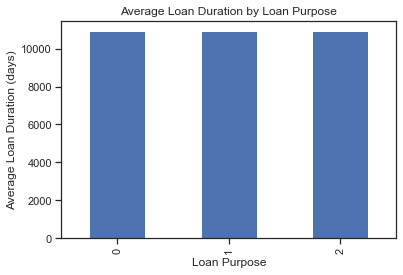

In [139]:
average_duration_by_purpose.plot(kind='bar')
plt.xlabel('Loan Purpose')
plt.ylabel('Average Loan Duration (days)')
plt.title('Average Loan Duration by Loan Purpose')
plt.show()


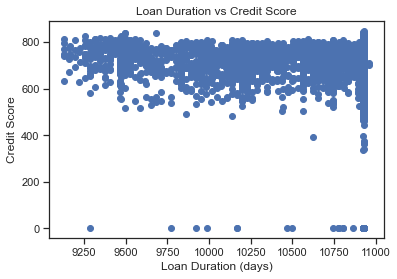

In [140]:
plt.scatter(df_selected['LoanDuration_days'], df_selected['CreditScore'])
plt.xlabel('Loan Duration (days)')
plt.ylabel('Credit Score')
plt.title('Loan Duration vs Credit Score')
plt.show()


In [141]:
df_selected['CreditScore_DTI_Combined'] = df_selected['CreditScore'] * df_selected['DTI']


In [142]:
df_selected.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,PropertyType_CO,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group,LoanDuration,LoanDuration_days,CreditScore_DTI_Combined
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02-01,N,2029-01-01,68,25,89,27,117000,15,...,0,0,0,1,3,0,1,10927 days,10927,0
F199Q1015092,0,1999-02-01,N,2029-01-01,95,0,73,17,109000,5,...,0,0,0,1,3,2,3,10927 days,10927,0
F199Q1266886,0,1999-02-01,N,2029-01-01,198,0,75,16,88000,17,...,0,0,0,1,3,2,1,10927 days,10927,0
F199Q1178167,0,1999-02-01,N,2029-01-01,210,0,76,14,160000,4,...,0,0,0,1,3,2,0,10927 days,10927,0
F199Q1178517,0,1999-02-01,N,2029-01-01,250,0,78,18,109000,32,...,0,0,0,1,3,2,1,10927 days,10927,0


In [143]:
df_selected['CreditScore_DTI_Combined'].value_counts()

0        18950
24480      226
18900      214
27720      210
26676      203
         ...  
48006        1
12264        1
2286         1
29784        1
24621        1
Name: CreditScore_DTI_Combined, Length: 11866, dtype: int64

In [144]:
# Resampling the class counts
class_counts = df_selected['EverDelinquent'].value_counts()
print(class_counts)


0    233788
1     57663
Name: EverDelinquent, dtype: int64


In [145]:
X = df_selected.drop('EverDelinquent', axis=1)
y = df_selected['EverDelinquent']

In [146]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [147]:
resampled_class_counts = pd.Series(y_resampled).value_counts()
print(resampled_class_counts)

0    57663
1    57663
Name: EverDelinquent, dtype: int64


In [148]:
y_resampled=pd.DataFrame(y_resampled,columns=["EverDelinquent"])
y_resampled

,EverDelinquent
LoanSeqNum,
F199Q1387523,0
F199Q1263006,0
F199Q1301977,0
F199Q1331791,0
F199Q1400991,0
...,...
F199Q1283716,1
F199Q1088423,1
F199Q1401375,1


In [149]:
df_sampled=pd.concat([X_resampled,y_resampled],axis=1)
df_sampled.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group,LoanDuration,LoanDuration_days,CreditScore_DTI_Combined,EverDelinquent
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1387523,650,1999-05-01,Y,2029-04-01,95,30,95,33,212000,5,...,0,1,0,1,0,0,10928 days,10928,21450,0
F199Q1263006,738,1999-04-01,N,2029-03-01,273,0,80,23,102000,15,...,0,0,1,2,0,1,10927 days,10927,16974,0
F199Q1301977,784,1999-03-01,N,2029-02-01,371,25,90,13,127000,47,...,0,0,1,0,0,4,10930 days,10930,10192,0
F199Q1331791,709,1999-05-01,N,2029-04-01,307,0,46,19,60000,46,...,0,0,0,2,1,1,10928 days,10928,13471,0
F199Q1400991,607,2000-10-01,N,2029-02-01,391,0,69,41,42000,38,...,0,0,1,3,2,0,10350 days,10350,24887,0


In [150]:
df_sampled.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group,LoanDuration,LoanDuration_days,CreditScore_DTI_Combined,EverDelinquent
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1283716,818,1999-04-01,N,2029-03-01,282,0,65,42,90000,9,...,0,1,0,0,2,3,10927 days,10927,34356,1
F199Q1088423,819,1999-03-01,N,2029-02-01,370,0,78,35,91000,23,...,0,0,1,0,2,1,10930 days,10930,28665,1
F199Q1401375,826,1999-03-01,N,2029-02-01,246,0,69,0,59000,35,...,0,0,0,0,2,1,10930 days,10930,0,1
F199Q1401355,826,1999-03-01,N,2029-02-01,250,0,58,0,25000,35,...,0,0,0,0,1,1,10930 days,10930,0,1
F199Q1387274,838,1999-03-01,N,2029-02-01,391,12,85,63,42000,5,...,0,0,1,0,0,0,10930 days,10930,52794,1


In [151]:
df_sampled.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group,LoanDuration,LoanDuration_days,CreditScore_DTI_Combined,EverDelinquent
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1387523,650,1999-05-01,Y,2029-04-01,95,30,95,33,212000,5,...,0,1,0,1,0,0,10928 days,10928,21450,0
F199Q1263006,738,1999-04-01,N,2029-03-01,273,0,80,23,102000,15,...,0,0,1,2,0,1,10927 days,10927,16974,0
F199Q1301977,784,1999-03-01,N,2029-02-01,371,25,90,13,127000,47,...,0,0,1,0,0,4,10930 days,10930,10192,0
F199Q1331791,709,1999-05-01,N,2029-04-01,307,0,46,19,60000,46,...,0,0,0,2,1,1,10928 days,10928,13471,0
F199Q1400991,607,2000-10-01,N,2029-02-01,391,0,69,41,42000,38,...,0,0,1,3,2,0,10350 days,10350,24887,0


In [152]:
df_sampled["EverDelinquent"].value_counts()

0    57663
1    57663
Name: EverDelinquent, dtype: int64

In [153]:
X.dtypes

CreditScore                           int64
FirstPaymentDate             datetime64[ns]
FirstTimeHomebuyer                   object
MaturityDate                 datetime64[ns]
MSA                                   int32
MIP                                   int64
OCLTV                                 int64
DTI                                   int64
OrigUPB                               int64
PropertyState                         int32
PostalCode                            int32
LoanPurpose                           int32
NumBorrowers                          int32
SellerName                            int32
ServicerName                          int32
MonthsDelinquent                      int64
Channel_R                             uint8
Channel_T                             uint8
PPM_Y                                 uint8
PropertyType_CO                       uint8
PropertyType_MH                       uint8
PropertyType_PU                       uint8
PropertyType_SF                 

In [154]:
X['FirstPaymentDate'] = pd.to_datetime(X['FirstPaymentDate'])
X['MaturityDate'] = pd.to_datetime(X['MaturityDate'])

In [155]:
X['FirstTimeHomebuyer'] = le.fit_transform(X['FirstTimeHomebuyer'])

In [156]:
# Select the numerical columns for PCA
numerical_columns = [
    'CreditScore',
    'OCLTV',
    'DTI',
    'OrigUPB',
    'MonthsDelinquent',
    'LoanDuration_days',
    'CreditScore_DTI_Combined',
    'MSA',
    'PropertyState',
    'PostalCode',
    'LoanPurpose',
    'NumBorrowers',
    'SellerName',
    'ServicerName',
    'NewCreditScore',
    'LTV Group',
    'MonthsInRepayment Group'
]
X_numerical = X[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# PCA
pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X_scaled)




In [157]:
# Explained variance ratio
# 10 componenets explaining 87 percent of variance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.13253993 0.11410587 0.09360027 0.08609152 0.06557283 0.06242721
 0.05993443 0.05854903 0.05647354 0.05271147]


In [158]:
principal_components = pca.components_
print("Principal components:", principal_components)

Principal components: [[ 0.23425779 -0.46100979 -0.43320854 -0.0860961  -0.08721836 -0.03170126
  -0.38361172  0.03941244 -0.03663172  0.02237571 -0.34258368  0.03048216
  -0.12531878 -0.0742813  -0.2495268   0.41603781  0.05898215]
 [-0.24872801  0.26990021 -0.50929978 -0.09242522  0.10212367 -0.01885123
  -0.56096762 -0.0727816   0.1503354  -0.21216021  0.22098819  0.05741643
  -0.0261144   0.19853692  0.20390901 -0.25311489  0.03321303]
 [-0.4171207  -0.18469216  0.14991367 -0.26449627  0.42002559  0.01507283
   0.06144182  0.0602177   0.10673352 -0.05800366 -0.31983335 -0.0604386
   0.07030318  0.02742102  0.40695771  0.23752863  0.40863829]
 [-0.3939727  -0.00493414 -0.04815615  0.37631387 -0.14648098  0.02654953
  -0.13003851  0.05537911 -0.31132158  0.36309375 -0.17063646  0.08396665
  -0.22004249 -0.17425007  0.40368913  0.09499994 -0.37814617]
 [ 0.13101666  0.08538916 -0.07240788  0.00364983  0.36320043  0.24661506
  -0.04469854  0.35597473 -0.28501161  0.50342511  0.14878017

In [159]:
Final_encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X,NewCreditScore,LTV Group,MonthsInRepayment Group
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,917827200000000000,N,1861920000000000000,68,25,1,1,89,27,...,0,0,0,0,0,1,0,3,0,1
F199Q1015092,0,917827200000000000,N,1861920000000000000,95,0,1,1,73,17,...,0,0,0,0,0,1,0,3,2,3
F199Q1266886,0,917827200000000000,N,1861920000000000000,198,0,1,1,75,16,...,0,0,0,0,0,1,0,3,2,1
F199Q1178167,0,917827200000000000,N,1861920000000000000,210,0,1,1,76,14,...,0,0,0,0,0,1,0,3,2,0
F199Q1178517,0,917827200000000000,N,1861920000000000000,250,0,1,1,78,18,...,0,0,0,0,0,1,0,3,2,1


In [160]:
Final_encoded_data["FirstTimeHomebuyer"].unique()

array(['N', 'X', 'Y'], dtype=object)

In [161]:
Final_encoded_data["FirstTimeHomebuyer"]=label_encoder.fit_transform(data["FirstTimeHomebuyer"])
Final_encoded_data["FirstTimeHomebuyer"].unique()

array([0, 1, 2])

In [162]:
Final_encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X,NewCreditScore,LTV Group,MonthsInRepayment Group
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,917827200000000000,0,1861920000000000000,68,25,1,1,89,27,...,0,0,0,0,0,1,0,3,0,1
F199Q1015092,0,917827200000000000,0,1861920000000000000,95,0,1,1,73,17,...,0,0,0,0,0,1,0,3,2,3
F199Q1266886,0,917827200000000000,0,1861920000000000000,198,0,1,1,75,16,...,0,0,0,0,0,1,0,3,2,1
F199Q1178167,0,917827200000000000,0,1861920000000000000,210,0,1,1,76,14,...,0,0,0,0,0,1,0,3,2,0
F199Q1178517,0,917827200000000000,0,1861920000000000000,250,0,1,1,78,18,...,0,0,0,0,0,1,0,3,2,1


In [163]:
df_selected["EverDelinquent"].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [164]:
df_sampled.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,...,PropertyType_MH,PropertyType_PU,PropertyType_SF,NewCreditScore,LTV Group,MonthsInRepayment Group,LoanDuration,LoanDuration_days,CreditScore_DTI_Combined,EverDelinquent
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1387523,650,1999-05-01,Y,2029-04-01,95,30,95,33,212000,5,...,0,1,0,1,0,0,10928 days,10928,21450,0
F199Q1263006,738,1999-04-01,N,2029-03-01,273,0,80,23,102000,15,...,0,0,1,2,0,1,10927 days,10927,16974,0
F199Q1301977,784,1999-03-01,N,2029-02-01,371,25,90,13,127000,47,...,0,0,1,0,0,4,10930 days,10930,10192,0
F199Q1331791,709,1999-05-01,N,2029-04-01,307,0,46,19,60000,46,...,0,0,0,2,1,1,10928 days,10928,13471,0
F199Q1400991,607,2000-10-01,N,2029-02-01,391,0,69,41,42000,38,...,0,0,1,3,2,0,10350 days,10350,24887,0


In [165]:
df_sampled["FirstTimeHomebuyer"]=label_encoder.fit_transform(df_sampled["FirstTimeHomebuyer"])
df_sampled["FirstTimeHomebuyer"].unique()

array([2, 0, 1])

In [166]:
df_sampled.dtypes

CreditScore                           int64
FirstPaymentDate             datetime64[ns]
FirstTimeHomebuyer                    int32
MaturityDate                 datetime64[ns]
MSA                                   int32
MIP                                   int64
OCLTV                                 int64
DTI                                   int64
OrigUPB                               int64
PropertyState                         int32
PostalCode                            int32
LoanPurpose                           int32
NumBorrowers                          int32
SellerName                            int32
ServicerName                          int32
MonthsDelinquent                      int64
Channel_R                             uint8
Channel_T                             uint8
PPM_Y                                 uint8
PropertyType_CO                       uint8
PropertyType_MH                       uint8
PropertyType_PU                       uint8
PropertyType_SF                 

In [167]:
df_preprocessed = df_sampled.copy()

In [168]:
# Convert FirstPaymentDate and MaturityDate to numerical representations
df_preprocessed['FirstPaymentYear'] = df_preprocessed['FirstPaymentDate'].dt.year
df_preprocessed['FirstPaymentMonth'] = df_preprocessed['FirstPaymentDate'].dt.month
df_preprocessed['MaturityYear'] = df_preprocessed['MaturityDate'].dt.year
df_preprocessed['MaturityMonth'] = df_preprocessed['MaturityDate'].dt.month

In [169]:
df_preprocessed['LoanDuration_days'] = df_preprocessed['LoanDuration'].dt.days

In [170]:
df_preprocessed.drop('LoanDuration', axis=1, inplace=True)

In [171]:
# Drop the original date columns
df_preprocessed.drop(['FirstPaymentDate', 'MaturityDate'], axis=1, inplace=True)

In [172]:
# Encode categorical variables
encoder = LabelEncoder()
df_preprocessed['MonthsInRepayment Group'] = encoder.fit_transform(df_preprocessed['MonthsInRepayment Group'])

In [173]:

X = df_preprocessed.drop('EverDelinquent', axis=1)
y = df_preprocessed['EverDelinquent']

In [174]:
# x_train = x_train.drop(["LoanDuration"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)


GaussianNB()

In [176]:
y_pred = naive_bayes.predict(X_test)

In [177]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7174195786005376
Confusion Matrix:
 [[11647    49]
 [ 6469  4901]]


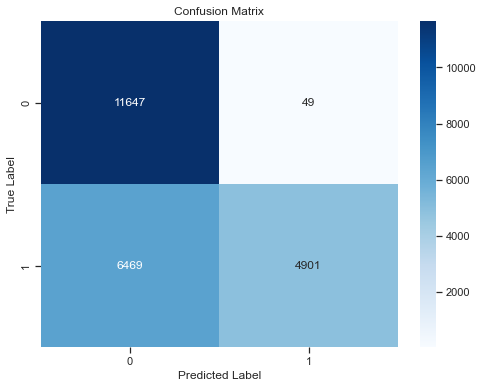

In [178]:
classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [179]:
# # SVM
# svm = SVC(kernel='linear')
# svm.fit(X_train, y_train)

In [180]:
df_preprocessed['EverDelinquent'].value_counts()

0    57663
1    57663
Name: EverDelinquent, dtype: int64

In [181]:
df_preprocessed.shape

(115326, 31)

In [182]:
df_zeros = df_preprocessed[df_preprocessed['EverDelinquent'] == 0]
df_ones = df_preprocessed[df_preprocessed['EverDelinquent'] == 1]
downsampling_size = 25000

In [183]:
# Downsampling both classes to the desired size
df_zeros_downsampled = resample(df_zeros,
                                   replace=False,
                                   n_samples=downsampling_size,
                                   random_state=42)
df_ones_downsampled = resample(df_ones,
                                   replace=False,
                                   n_samples=downsampling_size,
                                   random_state=42)


In [184]:
df_downsampled = pd.concat([df_zeros_downsampled, df_ones_downsampled])

In [185]:
df_downsampled['EverDelinquent'].value_counts()

0    25000
1    25000
Name: EverDelinquent, dtype: int64

In [186]:
df_downsampled.shape

(50000, 31)

In [187]:
# Shuffling the dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42)


In [188]:
X_svm = df_downsampled.drop('EverDelinquent', axis=1)
y_svm= df_downsampled['EverDelinquent']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

In [190]:
# Apply SVM on the downsampled dataset
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [191]:
# Perform prediction or further evaluation on the test set
y_pred = svm.predict(X_test)

In [192]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5297


In [193]:
# Applying GNB on downsampled data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [194]:
y_pred = gnb.predict(X_test)

In [195]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7125


In [196]:
df_preprocessed.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,OCLTV,DTI,OrigUPB,PropertyState,PostalCode,LoanPurpose,...,NewCreditScore,LTV Group,MonthsInRepayment Group,LoanDuration_days,CreditScore_DTI_Combined,EverDelinquent,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1387523,650,2,95,30,95,33,212000,5,717,2,...,1,0,0,10928,21450,0,1999,5,2029,4
F199Q1263006,738,0,273,0,80,23,102000,15,534,2,...,2,0,1,10927,16974,0,1999,4,2029,3
F199Q1301977,784,0,371,25,90,13,127000,47,111,1,...,0,0,4,10930,10192,0,1999,3,2029,2
F199Q1331791,709,0,307,0,46,19,60000,46,762,0,...,2,1,1,10928,13471,0,1999,5,2029,4
F199Q1400991,607,0,391,0,69,41,42000,38,867,0,...,3,2,0,10350,24887,0,2000,10,2029,2


In [197]:
df_preprocessed.shape

(115326, 31)

In [198]:
# Applying PCA to df_preprocessed

In [199]:
df_preprocessed.dtypes

CreditScore                 int64
FirstTimeHomebuyer          int32
MSA                         int32
MIP                         int64
OCLTV                       int64
DTI                         int64
OrigUPB                     int64
PropertyState               int32
PostalCode                  int32
LoanPurpose                 int32
NumBorrowers                int32
SellerName                  int32
ServicerName                int32
MonthsDelinquent            int64
Channel_R                   uint8
Channel_T                   uint8
PPM_Y                       uint8
PropertyType_CO             uint8
PropertyType_MH             uint8
PropertyType_PU             uint8
PropertyType_SF             uint8
NewCreditScore              int32
LTV Group                   int32
MonthsInRepayment Group     int64
LoanDuration_days           int64
CreditScore_DTI_Combined    int64
EverDelinquent              int64
FirstPaymentYear            int64
FirstPaymentMonth           int64
MaturityYear  

In [200]:
X = df_preprocessed.drop('EverDelinquent', axis=1)
y = df_preprocessed['EverDelinquent']

In [201]:
# Apply PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

In [202]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio of PC{i+1}: {ratio:.2f}")

Explained variance ratio of PC1: 0.97
Explained variance ratio of PC2: 0.03


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [204]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)


In [205]:
print(gnb_accuracy)

0.5320384982224919


In [206]:
# Now applying PCA on downsampled data 

In [207]:
df_downsampled.shape

(50000, 31)

In [208]:
X = df_downsampled.drop('EverDelinquent', axis=1)
y = df_downsampled['EverDelinquent']

In [209]:
# Apply PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

In [210]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio of PC{i+1}: {ratio:.2f}")

Explained variance ratio of PC1: 0.97
Explained variance ratio of PC2: 0.03


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [212]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)

In [213]:
print(gnb_accuracy)

0.5327


In [214]:
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)

In [215]:
print(svm_accuracy)

0.5324


# Tune Parameters

# 1.Regularization

In [216]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.5324

In [217]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.5334

# 2.Gamma

In [218]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.5039

# 3.Kernel

In [219]:
# model_linear_kernal = SVC(kernel='linear')
# model_linear_kernal.fit(X_train, y_train)

In [220]:
# model_linear_kernal.score(X_test, y_test)

In [221]:
X_pca=pd.DataFrame(X_pca,columns=["pc1","pc2"])
X_pca.dtypes

pc1    float64
pc2    float64
dtype: object

In [222]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)
print(gnb_accuracy)

0.5327


In [223]:
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)

In [224]:
print(svm_accuracy)

0.5324


# Factor Analysis

In [225]:
fa = FactorAnalysis(n_components=20) 
fa.fit(X)
X_fa = fa.transform(X)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_fa, y, test_size=0.2, random_state=42)

In [227]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)
print(gnb_accuracy)

0.631


In [228]:
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print(svm_accuracy)

0.9679


# Prepayment  

In [229]:
data1 =pd.read_csv("D:\Technocolabs\Final project-11-June-2023\LoanExport\Loan_Export.csv")
data1.shape
pd.set_option('display.max_columns', None)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8280\4167326396.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 =pd.read_csv("D:\Technocolabs\Final project-11-June-2023\LoanExport\Loan_Export.csv")


In [230]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [231]:
data1.duplicated().sum()

0

In [232]:
data1.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [233]:
data1["SellerName"].fillna('NA',inplace=True)
data1.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [234]:
#Looking for the abnormal data points in the data
print("Credit Score:\n", (data1.CreditScore==0).value_counts(),"\n\n")
print("First Time Home buyer:\n", data1.FirstTimeHomebuyer.value_counts(),"\n\n")
print("MSA:\n", (data1.MSA=="X    ").value_counts(),"\n\n")
print("DTI:\n", (data1.DTI==0).value_counts(),"\n\n")
print("PPM:\n", data1.PPM.value_counts(),"\n\n")
print("Property Type:\n", data1.PropertyType.value_counts(),"\n\n")
print("Num Borrowers:\n", data1.NumBorrowers.value_counts(),"\n\n")

Credit Score:
 False    290262
True       1189
Name: CreditScore, dtype: int64 


First Time Home buyer:
 N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64 


MSA:
 False    252351
True      39100
Name: MSA, dtype: int64 


DTI:
 False    273655
True      17796
Name: DTI, dtype: int64 


PPM:
 N    282125
X      5405
Y      3921
Name: PPM, dtype: int64 


Property Type:
 SF    244923
PU     27506
CO     18100
MH       723
LH       105
CP        72
X         22
Name: PropertyType, dtype: int64 


Num Borrowers:
 2     187335
1     103777
X        339
Name: NumBorrowers, dtype: int64 




In [235]:
#We will replace the columns with the mode imputations first.
replace = ['FirstTimeHomebuyer','PPM','PropertyType','NumBorrowers']
for column in replace:
    data1[column] = data1[column].replace('X ', data1[column].mode().values[0])

In [236]:
#We will replace the columns with the mean imputations .
data1['MSA'] = data1['MSA'].replace('X    ', data1.loc[data1['MSA'] != 'X    ', 'MSA'].astype(float).mean())
data1['CreditScore'] = data1['CreditScore'].replace(0, data1.loc[data1['CreditScore'] != 0, 'CreditScore'].astype(float).mean())
data1['DTI'] = data1['DTI'].replace(0, data1.loc[data1['DTI'] != 0, 'DTI'].astype(float).mean())

In [237]:
data1 = data1.drop(columns=["LoanSeqNum","ProductType","PropertyState","PostalCode","SellerName","ServicerName"])

In [238]:
data1["monthly_payment"] = ((data1["OrigUPB"]*(data1["OrigInterestRate"]/1200))*((1+(data1["OrigInterestRate"]/1200))**data1["OrigLoanTerm"])/(((1+(data1["OrigInterestRate"]/1200))**data1["OrigLoanTerm"])-1))
data1["total_payment"] = data1["monthly_payment"] * data1["OrigLoanTerm"]
data1["monthly_income"] = data1["monthly_payment"] / data1["DTI"]*100
def principal (monthly_rate, amount, emi, month):
    for i in range(month):
        interest=monthly_rate*amount
        p=emi-interest
        amount-=p
    return amount

data1["cur_principal"]=np.vectorize(principal) ((data1["OrigInterestRate"]/1200),data1['OrigUPB'],data1["monthly_payment"],data1["MonthsInRepayment"])
def prepay(dti, income):
    if(dti<40):
        p=income/2
    else: 
        p=income*3/4
    return p

data1["prepayment"]=np.vectorize(prepay) (data1["DTI"],data1['monthly_income']*24) 
data1['prepayment']=data1['prepayment'] - (data1['monthly_payment']*24)
data1

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,monthly_payment,total_payment,monthly_income,cur_principal,prepayment
0,711.841009,199902,N,202901,16974,25,1,O,89,27.000000,117000,89,6.750,T,N,SF,P,360,2,0,0,52,758.859773,273189.518275,2810.591752,110934.868922,15514.466470
1,711.841009,199902,N,202901,19740,0,1,O,73,17.000000,109000,73,6.500,R,N,SF,N,360,1,0,0,144,688.954146,248023.492419,4052.671445,87590.650220,32097.157842
2,711.841009,199902,N,202901,29940,0,1,O,75,16.000000,88000,75,6.875,T,N,SF,N,360,2,0,0,67,578.097356,208115.048172,3613.108475,81982.427803,29482.965158
3,711.841009,199902,N,202901,31084,0,1,O,76,14.000000,160000,76,6.875,R,N,SF,N,360,2,0,0,35,1051.086102,378390.996677,7507.757871,154806.854416,64867.028002
4,711.841009,199902,N,202901,35644,0,1,O,78,18.000000,109000,78,7.125,R,N,SF,N,360,2,0,0,54,734.353190,264367.148543,4079.739947,103470.092916,31332.402790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839.000000,199903,N,202902,37964,0,1,O,60,32.000000,90000,60,7.000,R,N,SF,N,360,2,0,0,12,598.772246,215558.008438,1871.163268,89085.771154,8083.425316
291447,840.000000,200210,N,202904,35644,0,1,O,73,31.986552,267000,73,6.375,C,N,SF,P,319,2,0,0,53,1739.309232,554839.644990,5437.626443,247417.820848,23508.095744
291448,840.000000,200304,N,202904,42044,0,1,O,73,31.000000,87000,73,5.625,R,N,SF,N,313,1,0,0,38,530.567053,166067.487620,1711.506623,81907.094623,7804.470200
291449,845.000000,199904,N,202903,37964,0,1,I,80,54.000000,88000,80,7.000,R,N,SF,P,360,2,0,0,32,585.466196,210767.830473,1084.196659,85470.337416,5464.351160


In [239]:
data1["Money_paid"] = data1['total_payment'] - data1['cur_principal']
data1['Money_paining_permonth'] = data1["Money_paid"] / data1['MonthsInRepayment']
data1['Ever_deliquent_Prepayment'] = (data1['EverDelinquent'] == 0)*data1['prepayment']
data1['Months_for_prepaymant'] = data1['prepayment']/(data1['monthly_income'] - data1['monthly_payment'])
data1['Economic PoWer'] = data1['Money_paining_permonth']/data1['monthly_payment']
data1

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,monthly_payment,total_payment,monthly_income,cur_principal,prepayment,Money_paid,Money_paining_permonth,Ever_deliquent_Prepayment,Months_for_prepaymant,Economic PoWer
0,711.841009,199902,N,202901,16974,25,1,O,89,27.000000,117000,89,6.750,T,N,SF,P,360,2,0,0,52,758.859773,273189.518275,2810.591752,110934.868922,15514.466470,162254.649353,3120.281718,15514.466470,7.561644,4.111803
1,711.841009,199902,N,202901,19740,0,1,O,73,17.000000,109000,73,6.500,R,N,SF,N,360,1,0,0,144,688.954146,248023.492419,4052.671445,87590.650220,32097.157842,160432.842199,1114.116960,32097.157842,9.542169,1.617113
2,711.841009,199902,N,202901,29940,0,1,O,75,16.000000,88000,75,6.875,T,N,SF,N,360,2,0,0,67,578.097356,208115.048172,3613.108475,81982.427803,29482.965158,126132.620370,1882.576423,29482.965158,9.714286,3.256504
3,711.841009,199902,N,202901,31084,0,1,O,76,14.000000,160000,76,6.875,R,N,SF,N,360,2,0,0,35,1051.086102,378390.996677,7507.757871,154806.854416,64867.028002,223584.142261,6388.118350,64867.028002,10.046512,6.077636
4,711.841009,199902,N,202901,35644,0,1,O,78,18.000000,109000,78,7.125,R,N,SF,N,360,2,0,0,54,734.353190,264367.148543,4079.739947,103470.092916,31332.402790,160897.055627,2979.575104,31332.402790,9.365854,4.057414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839.000000,199903,N,202902,37964,0,1,O,60,32.000000,90000,60,7.000,R,N,SF,N,360,2,0,0,12,598.772246,215558.008438,1871.163268,89085.771154,8083.425316,126472.237284,10539.353107,8083.425316,6.352941,17.601606
291447,840.000000,200210,N,202904,35644,0,1,O,73,31.986552,267000,73,6.375,C,N,SF,P,319,2,0,0,53,1739.309232,554839.644990,5437.626443,247417.820848,23508.095744,307421.824143,5800.411776,23508.095744,6.356430,3.334894
291448,840.000000,200304,N,202904,42044,0,1,O,73,31.000000,87000,73,5.625,R,N,SF,N,313,1,0,0,38,530.567053,166067.487620,1711.506623,81907.094623,7804.470200,84160.392997,2214.747184,7804.470200,6.608696,4.174302
291449,845.000000,199904,N,202903,37964,0,1,I,80,54.000000,88000,80,7.000,R,N,SF,P,360,2,0,0,32,585.466196,210767.830473,1084.196659,85470.337416,5464.351160,125297.493057,3915.546658,5464.351160,10.956522,6.687912


In [240]:
data1['EverDelinquent'].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [241]:
data1['MSA'] = data1['MSA'].astype(int)
data1['NumBorrowers'] = data1['NumBorrowers'].astype(int)

In [242]:
#label Encoding
cols = ['PPM','FirstTimeHomebuyer']
label_encoder = LabelEncoder()
for col in cols:
    data1[col] = label_encoder.fit_transform(data1[col])

#One hot encoding
cols = ['Channel', 'PropertyType', 'LoanPurpose', 'Occupancy']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data1_ohe = pd.DataFrame(OH_encoder.fit_transform(data1[cols])).astype('int64')


#get feature columns
data1_ohe.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
data1_ohe.index = data1.index


# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
data1 = pd.concat([data1.drop(cols, axis=1), data1_ohe], axis=1)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [243]:
df_zeros = data1[data1['EverDelinquent'] == 0]
df_ones = data1[data1['EverDelinquent'] == 1]
downsampling_size = 55000
# Downsampling both classes to the desired size
df_zeros_downsampled = resample(df_zeros,
                                   replace=False,
                                   n_samples=downsampling_size,
                                   random_state=42)
df_ones_downsampled = resample(df_ones,
                                   replace=False,
                                   n_samples=downsampling_size,
                                   random_state=42)
df_downsampled = pd.concat([df_zeros_downsampled, df_ones_downsampled])
df_downsampled = df_downsampled.reset_index()
df_downsampled = df_downsampled.drop('index' , axis = 1)
df_downsampled['EverDelinquent'].value_counts()

0    55000
1    55000
Name: EverDelinquent, dtype: int64

In [244]:
X = df_downsampled.drop({'Ever_deliquent_Prepayment','prepayment','monthly_payment','total_payment','monthly_income','cur_principal','prepayment','Money_paid','Money_paining_permonth','Ever_deliquent_Prepayment','Months_for_prepaymant','Economic PoWer'}, axis=1)
y = df_downsampled['Ever_deliquent_Prepayment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
# Instantiate and fit the XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate R^2 score
accuracy = r2_score(y_test, y_pred)
print("R^2 Score:", accuracy)

R^2 Score: 0.9917036880769612


In [246]:
X1 = df_downsampled[{'Months_for_prepaymant','Economic PoWer'}]
y1 = df_downsampled['Ever_deliquent_Prepayment']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8280\381933637.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X1 = df_downsampled[{'Months_for_prepaymant','Economic PoWer'}]


In [247]:
# Instantiate and fit the XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test1)

# Calculate R^2 score
accuracy = r2_score(y_test1, y_pred)
print("R^2 Score:", accuracy)

R^2 Score: 0.1497222138263551


In [248]:
# Create a SelectKBest object and fit it to the data
k_best_selector = SelectKBest(score_func=f_regression, k=10)  # Select the top 5 features (you can adjust the value of k)
X_train_selected = k_best_selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = k_best_selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:", selected_feature_names)


Selected Features: Index(['CreditScore', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')


In [249]:
X2 = df_downsampled[{'CreditScore', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'}]
y2 = df_downsampled['Ever_deliquent_Prepayment']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8280\1023366463.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X2 = df_downsampled[{'CreditScore', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'NumBorrowers',


In [259]:
# Instantiate and fit the XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test2)

# Calculate R^2 score
accuracy = r2_score(y_test2, y_pred)
print("R^2 Score:", accuracy)

R^2 Score: 0.9957600554989893


In [254]:
import pandas as pd
import xgboost as xgb
#from sklearn.model_selection im


# Create an XGBoost regression model with regularization and controlled learning rate
xgb_model = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=1000,  # Large number of trees, but early stopping will stop training when necessary
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    random_state=42
)

# Fit the model with early stopping
eval_set = [(X_train2, y_train2), (X_test2, y_test2)]
xgb_model.fit(
    X_train2, y_train2,
    eval_metric="rmse",
    eval_set=eval_set,
    early_stopping_rounds=10,
    verbose=True
)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test2)

# Calculate R^2 score
accuracy = r2_score(y_test2, y_pred)
print("R^2 Score:", accuracy)



[0]	validation_0-rmse:22237.32338	validation_1-rmse:18245.92968


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:20500.80698	validation_1-rmse:16768.72620
[2]	validation_0-rmse:19844.03228	validation_1-rmse:15988.57937
[3]	validation_0-rmse:18272.67796	validation_1-rmse:14593.84268
[4]	validation_0-rmse:16812.11701	validation_1-rmse:13334.67276
[5]	validation_0-rmse:15508.05731	validation_1-rmse:12217.47931
[6]	validation_0-rmse:14305.84597	validation_1-rmse:11299.14550
[7]	validation_0-rmse:13286.86967	validation_1-rmse:10330.68019
[8]	validation_0-rmse:12302.13872	validation_1-rmse:9583.75318
[9]	validation_0-rmse:11371.42858	validation_1-rmse:8843.86551
[10]	validation_0-rmse:10660.61879	validation_1-rmse:8317.48608
[11]	validation_0-rmse:10413.27605	validation_1-rmse:8035.49269
[12]	validation_0-rmse:9716.17322	validation_1-rmse:7455.04404
[13]	validation_0-rmse:9012.92892	validation_1-rmse:6911.40159
[14]	validation_0-rmse:8846.14134	validation_1-rmse:6720.72364
[15]	validation_0-rmse:8369.74260	validation_1-rmse:6416.67193
[16]	validation_0-rmse:7859.92936	validation_1

In [261]:
# Create an XGBoost regression model with regularization and controlled learning rate
xgb_model = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=1000,  # Large number of trees, but early stopping will stop training when necessary
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    random_state=42
)

# Fit the model with early stopping
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(
    X_train, y_train,
    eval_metric="rmse",
    eval_set=eval_set,
    early_stopping_rounds=10,
    verbose=True
)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate R^2 score
accuracy = r2_score(y_test, y_pred)
print("R^2 Score:", accuracy)



C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:22237.32338	validation_1-rmse:18245.92968
[1]	validation_0-rmse:20496.48757	validation_1-rmse:16782.78485
[2]	validation_0-rmse:19757.21939	validation_1-rmse:15992.74349
[3]	validation_0-rmse:18193.27651	validation_1-rmse:14600.76566
[4]	validation_0-rmse:16734.93376	validation_1-rmse:13451.63376
[5]	validation_0-rmse:16353.85076	validation_1-rmse:13002.13971
[6]	validation_0-rmse:15090.62348	validation_1-rmse:12037.18482
[7]	validation_0-rmse:14131.53555	validation_1-rmse:11156.08370
[8]	validation_0-rmse:13720.17504	validation_1-rmse:10805.86072
[9]	validation_0-rmse:12688.06817	validation_1-rmse:9982.29983
[10]	validation_0-rmse:11767.02559	validation_1-rmse:9305.10750
[11]	validation_0-rmse:11504.55820	validation_1-rmse:9060.70274
[12]	validation_0-rmse:10713.00363	validation_1-rmse:8423.49806
[13]	validation_0-rmse:10015.66859	validation_1-rmse:7882.97137
[14]	validation_0-rmse:9805.30863	validation_1-rmse:7712.92850
[15]	validation_0-rmse:9121.86449	validati